In [37]:
import keras
import tensorflow
from keras.engine.saving import load_model
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D, SeparableConv2D
from keras.regularizers import l2
from keras.optimizers import SGD, RMSprop
from keras.utils import to_categorical
from keras.layers.normalization import BatchNormalization
from keras.utils.vis_utils import plot_model
from keras.layers import Input, MaxPooling2D, concatenate, AveragePooling2D
from keras import models
from keras.models import Model
from keras_preprocessing.image import ImageDataGenerator
import numpy as np
from keras import regularizers
from keras import backend as K
from keras.applications.inception_v3 import InceptionV3
import matplotlib.pyplot as plt
from sklearn.metrics import cohen_kappa_score


In [38]:
import cv2
import numpy as np
import tensorflow as tf
import keras
from keras import backend as K
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.layers import Dense,GlobalAveragePooling2D,Dropout,SeparableConv2D,BatchNormalization, Activation, Dense
from keras.applications.mobilenet import MobileNet
from keras.optimizers import Adam
import sys
import warnings

In [39]:
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import glob
import cv2
import seaborn as sns
import os 
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import regularizers
from keras import applications
from keras import backend as K
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import random

from matplotlib import pyplot as plt

In [40]:

mura_Dir = "MURA-v1.1/"
train_imgs_path=pd.read_csv(mura_Dir+'train_image_paths.csv',names=["Train Dataset"])
train_labels=pd.read_csv(mura_Dir+'train_labeled_studies.csv',names=["Train Labeled Studies","label"])
test_imgs_path=pd.read_csv(mura_Dir+'valid_image_paths.csv',names=["Test Dataset"])
test_labels=pd.read_csv(mura_Dir+'valid_labeled_studies.csv',names=["Test Labeled Studies","label"])

In [41]:
train_imgs_path=train_imgs_path.sort_values(by=['Train Dataset'])
train_labels=train_labels.sort_values(by=['Train Labeled Studies'])
test_imgs_path=test_imgs_path.sort_values(by=['Test Dataset'])
test_labels=test_labels.sort_values(by=['Test Labeled Studies'])

In [42]:
test_labels['Body Part']=test_labels['Test Labeled Studies'].apply(lambda x: str(x.split('/')[2])[3:])
test_labels['Study Type']=test_labels['Test Labeled Studies'].apply(lambda x: str(x.split('/')[4])[:6])
test_labels['p']=test_labels['Test Labeled Studies'].apply(lambda x: str(x.split('/')[3])[:20])


In [43]:
train_labels['Body Part']=train_labels['Train Labeled Studies'].apply(lambda x: str(x.split('/')[2])[3:])
train_labels['Study Type']=train_labels['Train Labeled Studies'].apply(lambda x: str(x.split('/')[4])[:6])
train_labels['p']=train_labels['Train Labeled Studies'].apply(lambda x: str(x.split('/')[3])[:20])


# $~Statistics Of Data$ 
Bar Plots For Mura variants between its count between classes and Body Parts , the Body parts , Studies of Patients and their  Classes


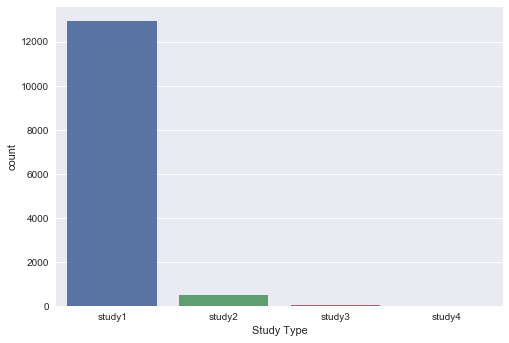

In [44]:
sns.countplot(data=train_labels,x='Study Type')

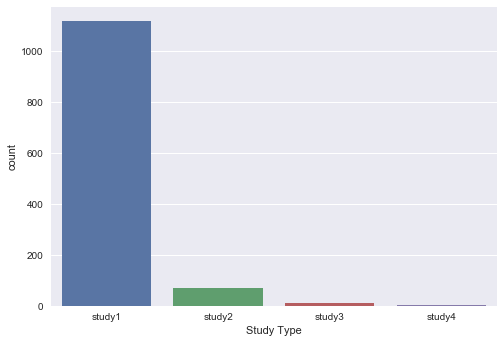

In [45]:
sns.countplot(data=test_labels,x='Study Type')

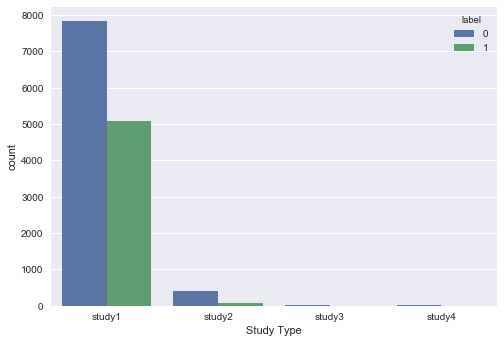

In [46]:
sns.countplot(data=train_labels,x='Study Type',hue='label')

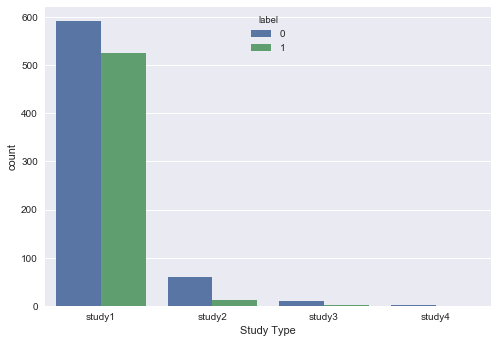

In [47]:
sns.countplot(data=test_labels,x='Study Type',hue='label')

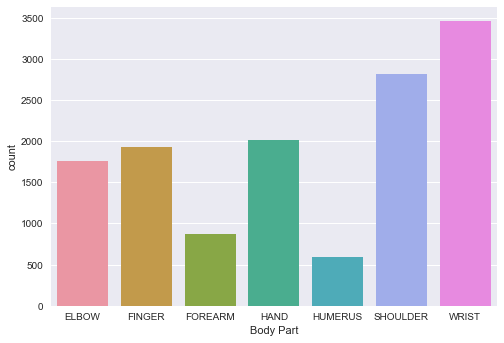

In [48]:
sns.countplot(data=train_labels,x='Body Part')

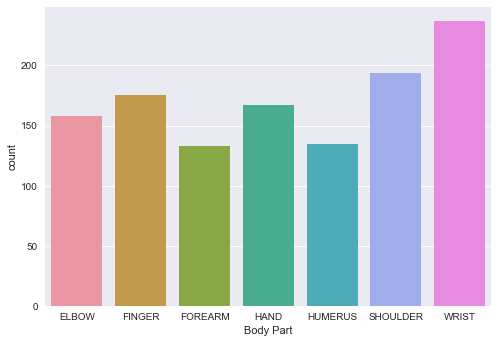

In [49]:
sns.countplot(data=test_labels,x='Body Part')

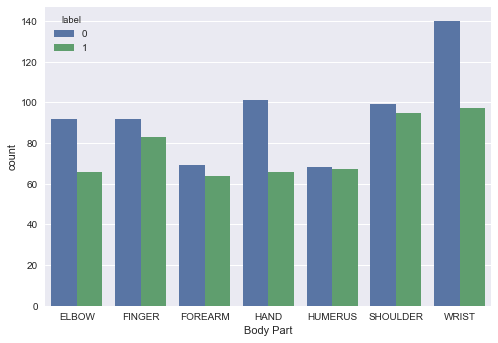

In [50]:
import seaborn as sns
sns.countplot(data=test_labels,x='Body Part',hue='label')

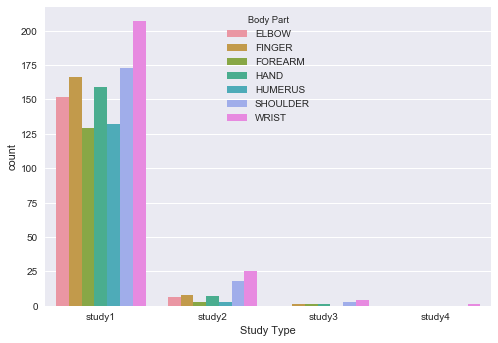

In [51]:
sns.countplot(data=test_labels,x='Study Type',hue='Body Part')

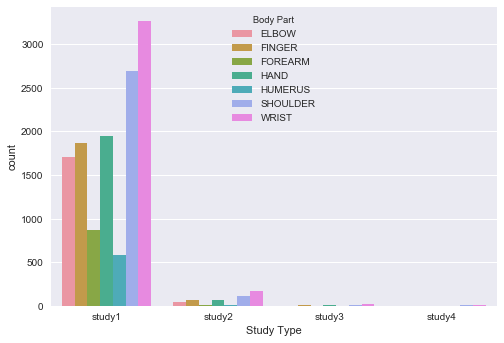

In [52]:
sns.countplot(data=train_labels,x='Study Type',hue='Body Part')

In [53]:
def fileImagesOfStudy(path):
    img_dir = path # Enter Directory of all images 
    data_path = os.path.join(img_dir,'*g')
    files = glob.glob(data_path)
    data = []
    i=0
    for f1 in files:
        i=i+1
        img = cv2.imread(f1)
        data.append(img)
           
    return data

In [54]:
import matplotlib.pyplot as plt


In [55]:
def stretching_Data(files_,dim):
    stretch=[]
    for e in range(0,len(files_)):
        f=files_.iloc[e][0]
        dd=fileImagesOfStudy(f)
        for n in range(0,len(dd)):
            stretch.append(cv2.resize(dd[n],dsize=dim))
               
    return stretch

In [56]:
def stretching_Labels(labels_):
    labels=[]
    for e in range(0,len(labels_)):
        l=labels_.iloc[e]['label']
        f=labels_.iloc[e][0]
        dd=fileImagesOfStudy(f)
        for n in range(0,len(dd)):
            labels.append(l)
    return labels

In [57]:
def show_images(images, cols = 1, titles = None):
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        if image.ndim == 2:
            plt.gray()
        plt.grid(False)

        plt.imshow(image)
        a.set_title(title)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)

    plt.show()

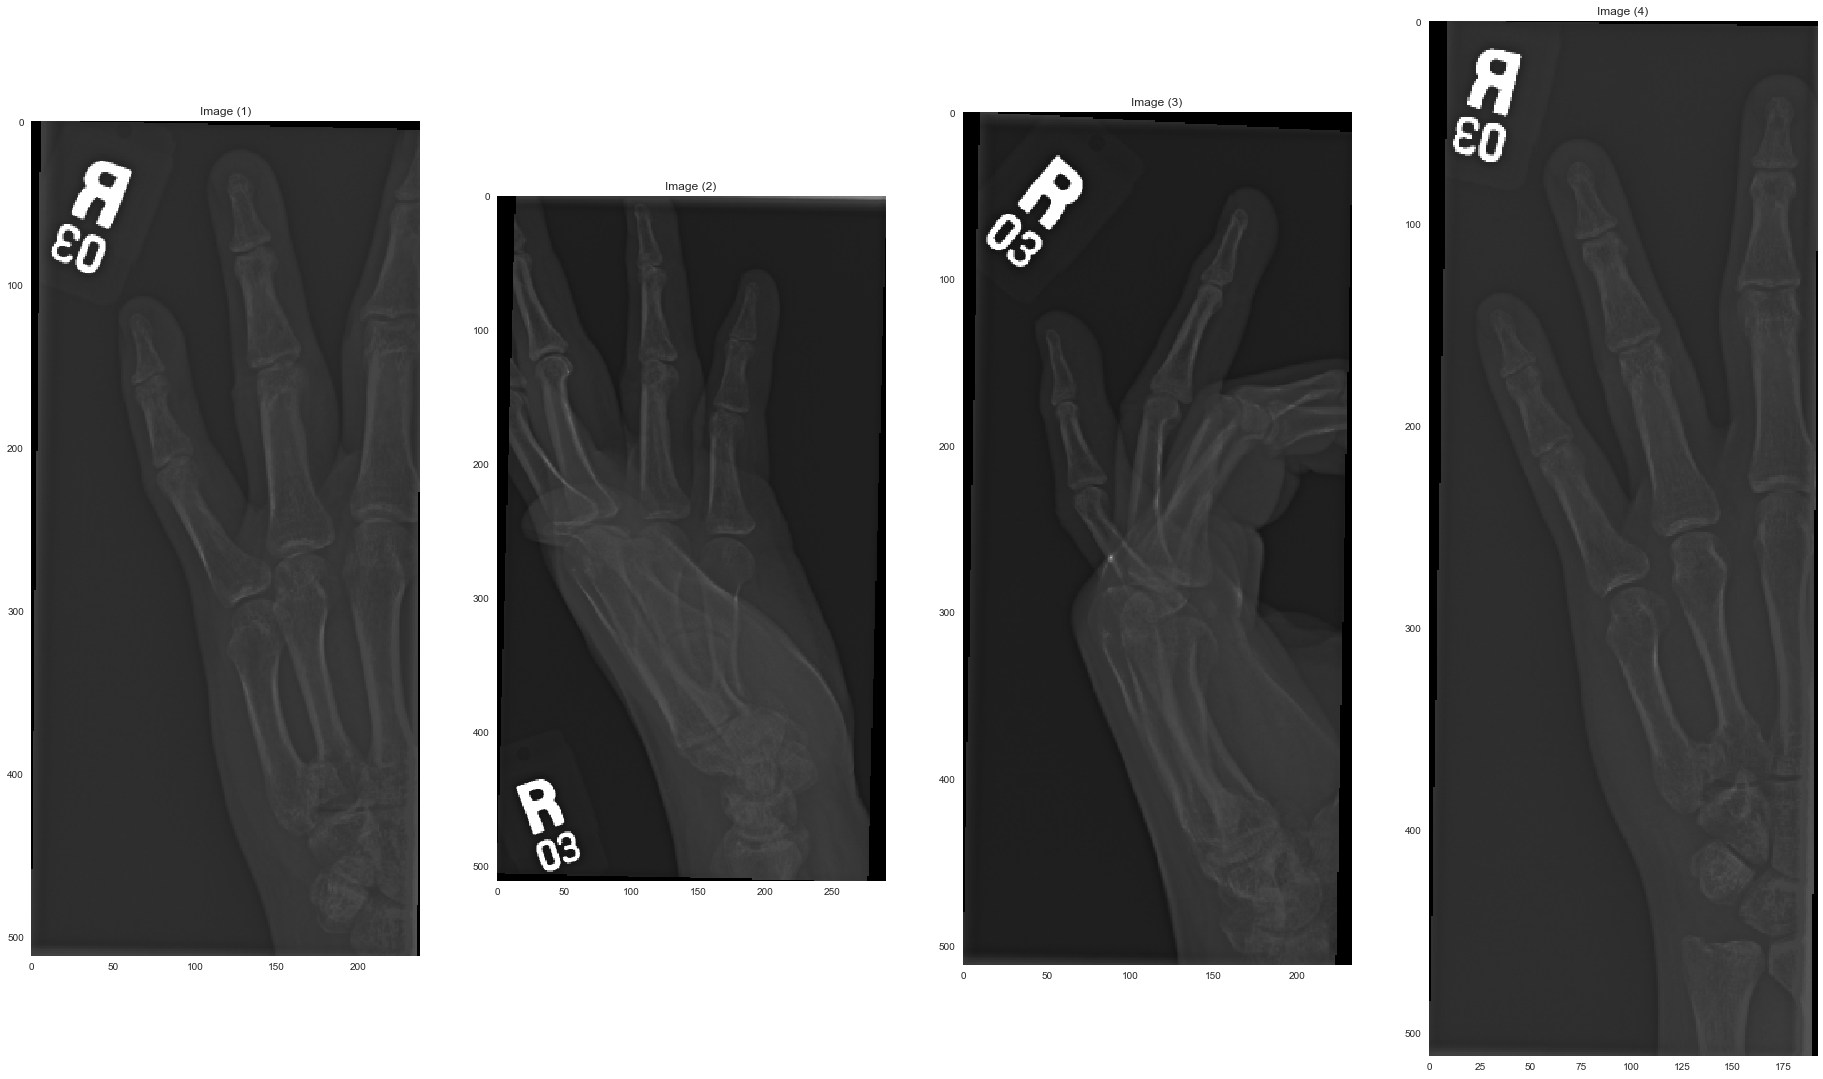

In [58]:

l=train_labels.iloc[2054]['Train Labeled Studies']
images=fileImagesOfStudy(l)
show_images(images)

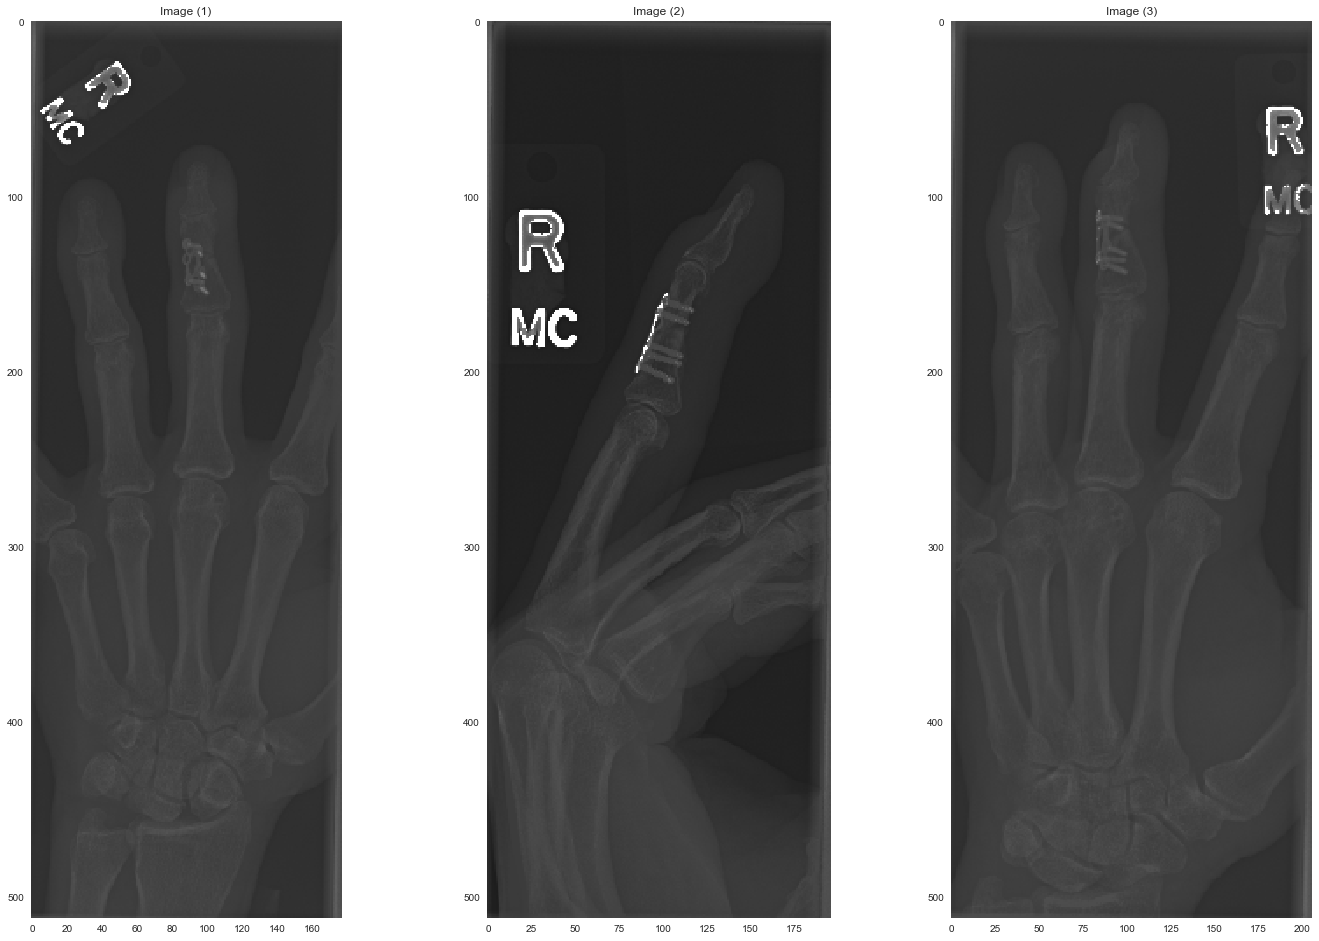

In [59]:
l=train_labels.iloc[2093]['Train Labeled Studies']
images=fileImagesOfStudy(l)
show_images(images)

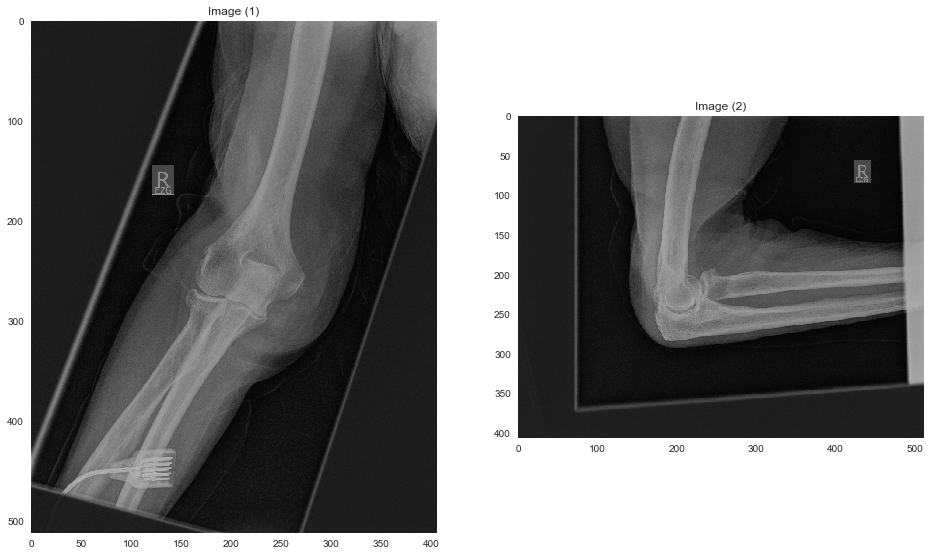

In [60]:
l=train_labels.iloc[3]['Train Labeled Studies']
images=fileImagesOfStudy(l)
show_images(images)

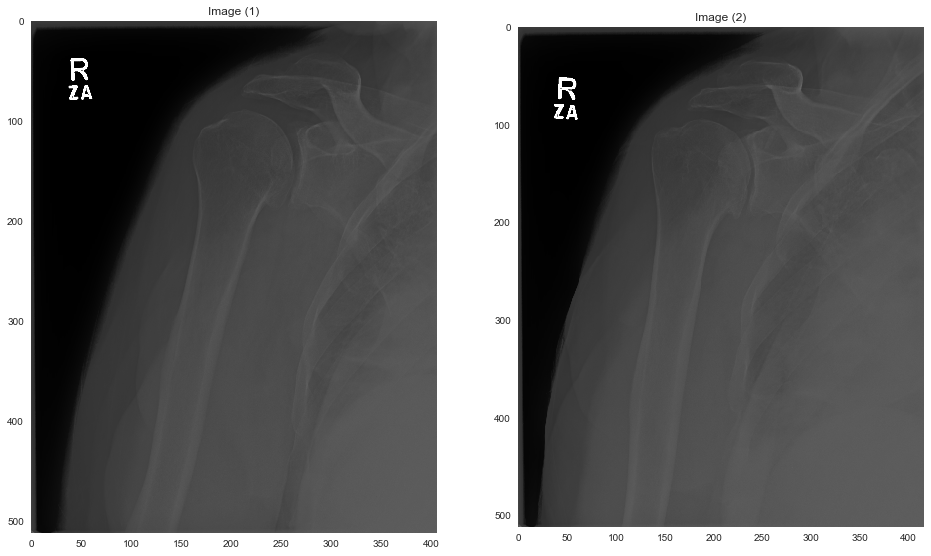

In [61]:
l=train_labels.iloc[7899]['Train Labeled Studies']
images=fileImagesOfStudy(l)
show_images(images)

In [62]:
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random
%matplotlib inline
plt.style.use("seaborn")


In [63]:
def prepareDataVGG(className):
    reszizing_Dim=(60,60)
    train_= train_labels[train_labels['Body Part'] ==className]
    test_ = test_labels[test_labels['Body Part'] ==className]
    data__Test=stretching_Data(test_,reszizing_Dim)
    labels_Test=stretching_Labels(test_)
    data__Train=stretching_Data(train_,reszizing_Dim)
    labels_Train=stretching_Labels(train_)
    data__Test=np.asarray(data__Test)
    labels_Test=np.asarray(labels_Test)
    data__Train=np.asarray(data__Train)
    labels_Train=np.asarray(labels_Train)

    return data__Train,labels_Train,data__Test,labels_Test

In [64]:
def prepareDataMobile(className):
    reszizing_Dim=(80,80)
    train_= train_labels[train_labels['Body Part'] ==className]
    test_ = test_labels[test_labels['Body Part'] ==className]
    data__Test=stretching_Data(test_,reszizing_Dim)
    labels_Test=stretching_Labels(test_)
    data__Train=stretching_Data(train_,reszizing_Dim)
    labels_Train=stretching_Labels(train_)
    data__Test=np.asarray(data__Test)
    labels_Test=np.asarray(labels_Test)
    data__Train=np.asarray(data__Train)
    labels_Train=np.asarray(labels_Train)

    return data__Train,labels_Train,data__Test,labels_Test

In [65]:
def vgg19Model(data__Train,labels_Train,data__Test,labels_Test):

    vgg19 = applications.VGG19(include_top=False, weights='imagenet', input_shape=data__Train.shape[1:])
    vgg_model = Sequential()
    vgg_model.add(vgg19)
    vgg_model.add(Flatten())
    vgg_model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    vgg_model.add(Dropout(0.5))
    vgg_model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    vgg_model.add(Dropout(0.5))
    vgg_model.add(Dense(1, activation='sigmoid'))
    vgg_model.layers[0].trainable = False
    vgg_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    history_vgg19 = vgg_model.fit(data__Train, labels_Train, epochs=20, batch_size=64, workers=10, validation_data=(data__Test, labels_Test))
    return history_vgg19,vgg_model

In [66]:
from keras import regularizers

def mobileNet_Model(data__Train,labels_Train,data__Test,labels_Test):


    if not sys.warnoptions:
        warnings.simplefilter("ignore")
    base_model = MobileNet(include_top=False,weights='imagenet', input_shape=data__Train.shape[1:])
    base_model.trainable = False
    x=base_model.output
    x=keras.layers.MaxPooling2D()(x)
    x=Flatten()(x)
    x=Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
    x=Dropout(0.5)(x)
    x=Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
    x=Dropout(0.5)(x)
    preds=Dense(1, activation='sigmoid')(x)

    model=Model(inputs=base_model.input,outputs=preds)
    model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    history = model.fit(data__Train, labels_Train, epochs=20, batch_size=64,  validation_data=(data__Test, labels_Test))
    return history, model

In [67]:
def plotingModel(history_):

    plt.plot(history_.history['loss'])
    plt.plot(history_.history['val_loss'])
    plt.title("Train vs Validation Loss")
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.grid(False)

    plt.legend(['train', 'test'], loc='upper right')

In [85]:
#true_negative, false_positive, false_negative, true_positive
def kappaC(tn,fp,fn,tp):
    total_n=tn+fp+fn+tp
    P_totalAgree=(tt+ff)/total_n
    acctual_no=tn+fp
    acctual_yes=fn+tp
    predicted_no=tn+fn
    predicted_yes=fp+fn
    P__no=(acctual_no/total_n)*(predicted_no/total_n)    
    P__yes=(acctual_yes/total_n)*(predicted_yes/total_n)
    Pchance=P__no+P__yes
    theKappa=(P_totalAgree-Pchance)/(1-Pchance)
    return theKappa

In [84]:
def plotResults(data__Test,labels_Test,_model):
    test_loss, test_acc = _model.evaluate(data__Test, labels_Test, batch_size=100)
    print("Loss on test set: ", test_loss)
    print("Accuracy on test set: ", test_acc)
    test_logits = _model.predict(data__Test, batch_size=10)
    cm  = confusion_matrix(labels_Test, np.round(test_logits))
    plt.figure()
    plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
    plt.xticks(range(2), ['Normal', 'Abnromal'], fontsize=16)
    plt.yticks(range(2), ['Normal', 'Abnormal'], fontsize=16)
    plt.show()
    true_negative, false_positive, false_negative, true_positive  = cm.ravel()
    precision = true_positive / (true_positive + false_positive)
    recall = true_positive / (true_positive + false_negative)
    f1=2*((precision*recall)/(precision+recall))
    kappa=kappaC(true_negative, false_positive, false_negative, true_positive)
    
    print('Precison of MURA for Abnormal:{:.2f}'.format(precision))
    print('Recall of MURA for Abnormal:{:.2f}'.format(recall))
    print('Fmeasure of MURA for Abnormal:{:.2f}'.format(f1))
    print('Kappa of MURA for Abnormal:{:.2f}'.format(kappa))
    num_test = 20
    predictions = _model.predict(data__Test[:num_test,:,:,:])
    for i in range(num_test):
        if predictions[i] <test_acc:
            print("Predicted: Abnormal ",predictions[i])
        else:
            print("predicted: Normal",predictions[i])
        plt.imshow(data__Test[i])
        plt.grid(False)

        plt.show()
    return test_acc,kappa
   

$VGG19$

Train on 4931 samples, validate on 465 samples
Epoch 1/20
4931/4931 [==============================] - 141s 29ms/step - loss: 5.7051 - accuracy: 0.5581 - val_loss: 4.0599 - val_accuracy: 0.5849
Epoch 2/20
4931/4931 [==============================] - 141s 29ms/step - loss: 3.8088 - accuracy: 0.5938 - val_loss: 3.2985 - val_accuracy: 0.6172
Epoch 3/20
4931/4931 [==============================] - 140s 28ms/step - loss: 3.0717 - accuracy: 0.6092 - val_loss: 2.7507 - val_accuracy: 0.5957
Epoch 4/20
4931/4931 [==============================] - 139s 28ms/step - loss: 2.5446 - accuracy: 0.6297 - val_loss: 2.3137 - val_accuracy: 0.6108
Epoch 5/20
4931/4931 [==============================] - 140s 28ms/step - loss: 2.1492 - accuracy: 0.6516 - val_loss: 1.9720 - val_accuracy: 0.6452
Epoch 6/20
4931/4931 [==============================] - 141s 29ms/step - loss: 1.8438 - accuracy: 0.6585 - val_loss: 1.6995 - val_accuracy: 0.6538
Epoch 7/20
4931/4931 [==============================] - 140s 28ms/step 

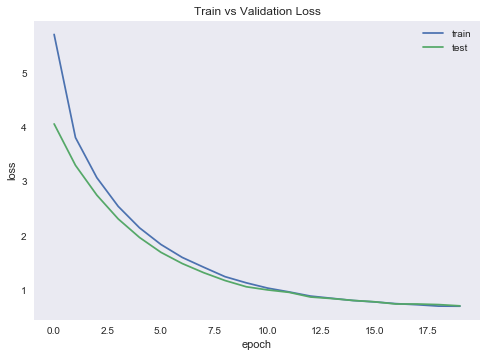

In [69]:
elbowClass='ELBOW'
dataElbow__Train_,labelsElbow_Train,dataElbow__Test,labelsWlbow_Test=prepareDataVGG(elbowClass)
historyElbow,modelElbow=vgg19Model(dataElbow__Train_,labelsElbow_Train,dataElbow__Test,labelsWlbow_Test)
plotingModel(historyElbow)


465/465 [==============================] - 19s 41ms/step
Loss on test set:  0.715373315477884
Accuracy on test set:  0.7075268626213074


<Figure size 576x396 with 0 Axes>

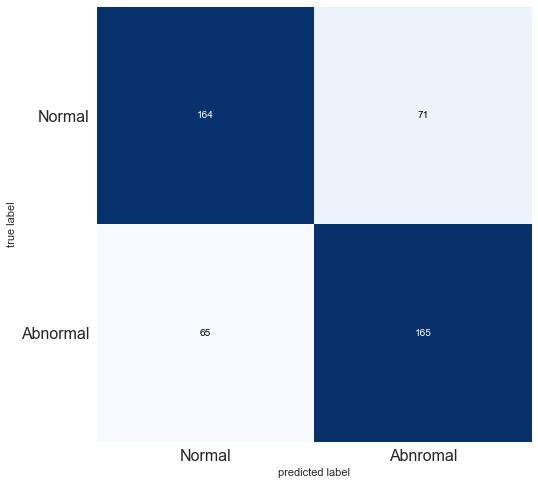

Precison of MURA for Abnormal:0.70
Recall of MURA for Abnormal:0.72
Fmeasure of MURA for Abnormal:0.71
Kappa of MURA for Abnormal:-0.06
Predicted: Abnormal  [0.51790375]


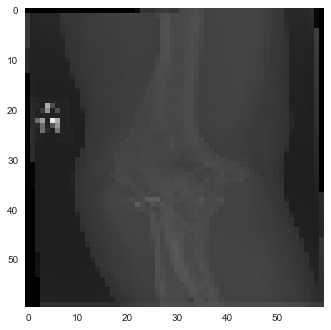

predicted: Normal [0.86242974]


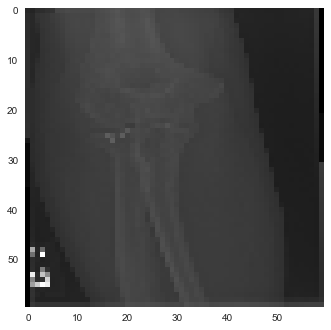

predicted: Normal [0.86867005]


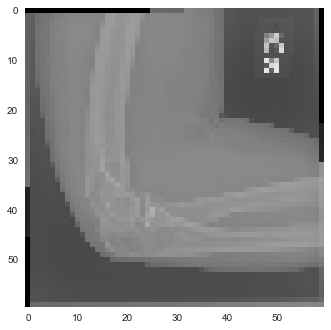

Predicted: Abnormal  [0.6497951]


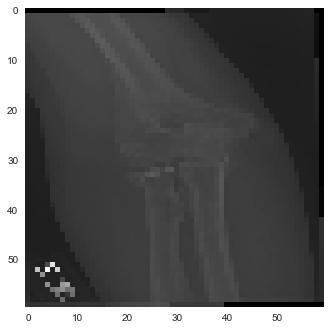

predicted: Normal [0.7452148]


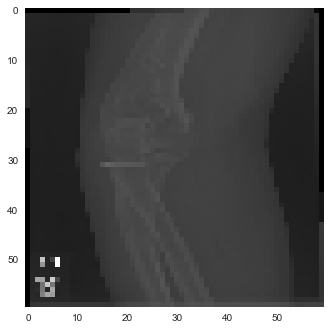

predicted: Normal [0.8683903]


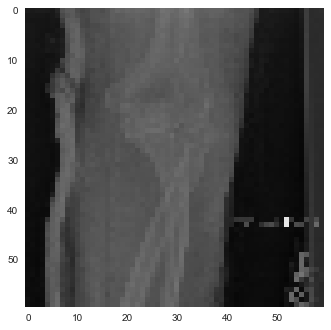

Predicted: Abnormal  [0.5601403]


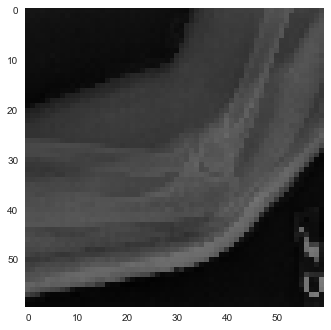

Predicted: Abnormal  [0.5141303]


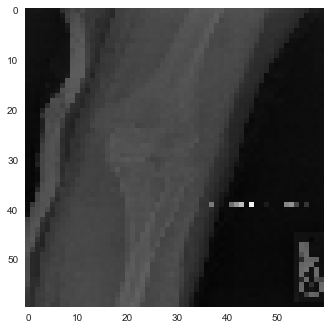

Predicted: Abnormal  [0.6948832]


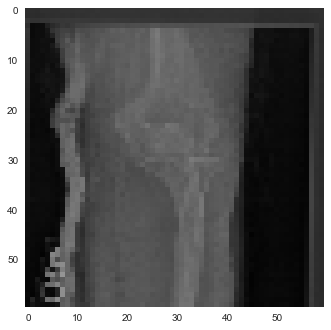

Predicted: Abnormal  [0.63196194]


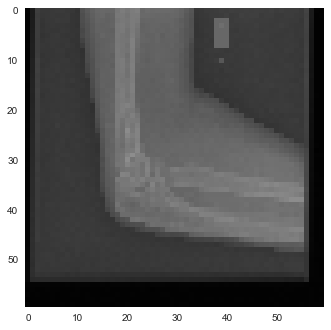

Predicted: Abnormal  [0.30752045]


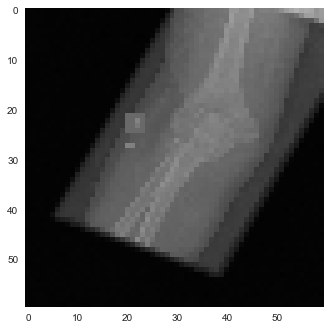

Predicted: Abnormal  [0.05186862]


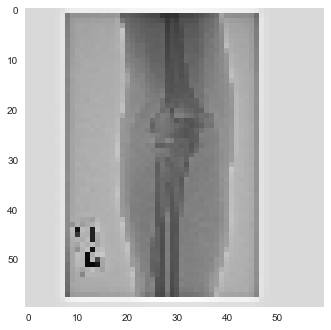

Predicted: Abnormal  [0.6054863]


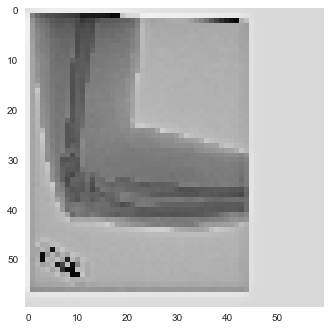

Predicted: Abnormal  [0.50994897]


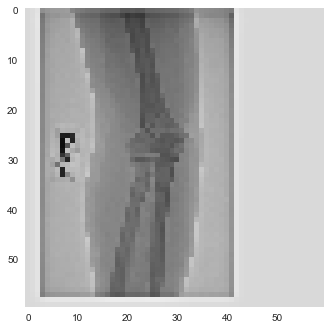

Predicted: Abnormal  [0.5764283]


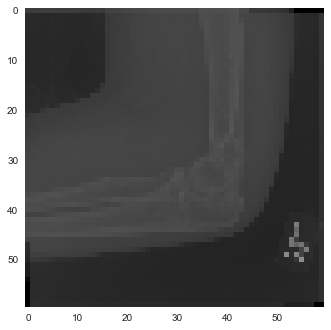

predicted: Normal [0.7427143]


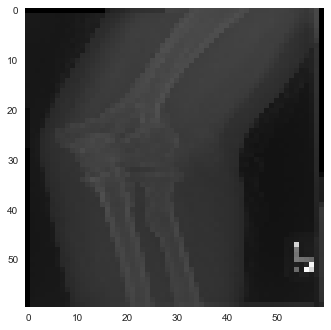

Predicted: Abnormal  [0.5763404]


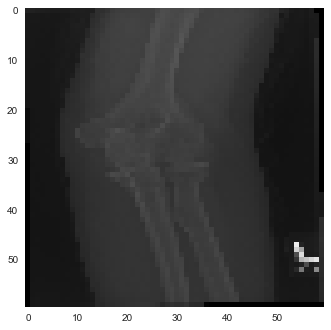

Predicted: Abnormal  [0.1246164]


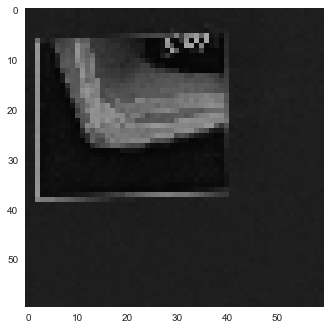

Predicted: Abnormal  [0.48806548]


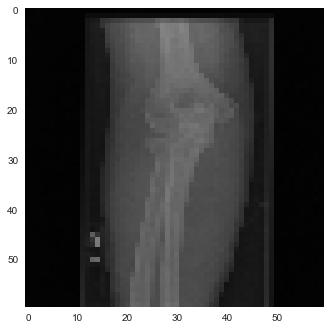

Predicted: Abnormal  [0.29997888]


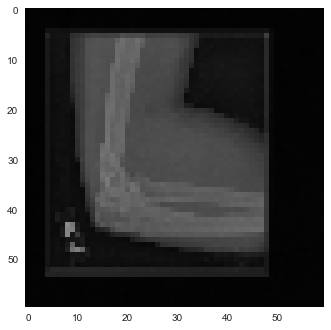

In [72]:
test_accElbow,kappa_vgg19_elbow=plotResults(dataElbow__Test,labelsWlbow_Test,modelElbow)

Train on 1272 samples, validate on 288 samples
Epoch 1/20
1272/1272 [==============================] - 69s 54ms/step - loss: 8.1273 - accuracy: 0.4992 - val_loss: 5.2738 - val_accuracy: 0.6667
Epoch 2/20
1272/1272 [==============================] - 71s 56ms/step - loss: 5.8016 - accuracy: 0.5763 - val_loss: 4.6578 - val_accuracy: 0.6354
Epoch 3/20
1272/1272 [==============================] - 79s 62ms/step - loss: 5.0588 - accuracy: 0.6006 - val_loss: 4.3676 - val_accuracy: 0.6215
Epoch 4/20
1272/1272 [==============================] - 72s 57ms/step - loss: 4.5771 - accuracy: 0.6250 - val_loss: 4.0981 - val_accuracy: 0.6806
Epoch 5/20
1272/1272 [==============================] - 69s 54ms/step - loss: 4.2614 - accuracy: 0.6250 - val_loss: 3.8835 - val_accuracy: 0.6632
Epoch 6/20
1272/1272 [==============================] - 68s 53ms/step - loss: 3.9508 - accuracy: 0.6305 - val_loss: 3.6901 - val_accuracy: 0.6701
Epoch 7/20
1272/1272 [==============================] - 68s 53ms/step - loss:

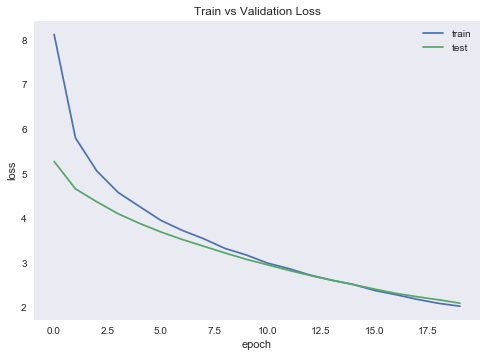

In [73]:
humerusClass='HUMERUS'
dataHumerus__Train_,labelsHumrus_Train,dataHumerus__Test,labelsHumerus_Test=prepareDataVGG(humerusClass)
historyHumerus,modelHumerus=vgg19Model(dataHumerus__Train_,labelsHumrus_Train,dataHumerus__Test,labelsHumerus_Test)
plotingModel(historyHumerus)


288/288 [==============================] - 12s 43ms/step
Loss on test set:  2.09089062611262
Accuracy on test set:  0.7222222089767456


<Figure size 576x396 with 0 Axes>

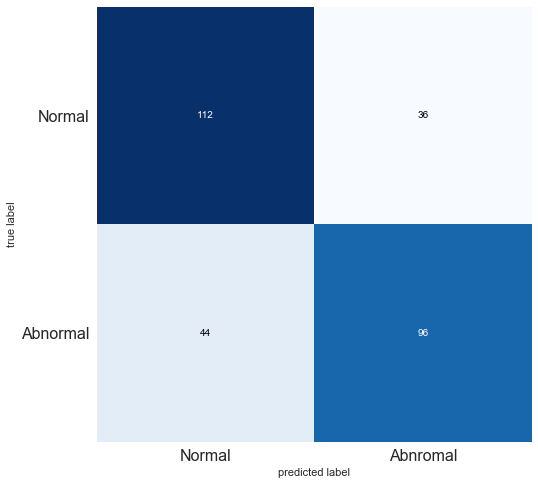

Precison of MURA for Abnormal:0.73
Recall of MURA for Abnormal:0.69
Fmeasure of MURA for Abnormal:0.71
Kappa of MURA for Abnormal:0.13
Predicted: Abnormal  [0.3808327]


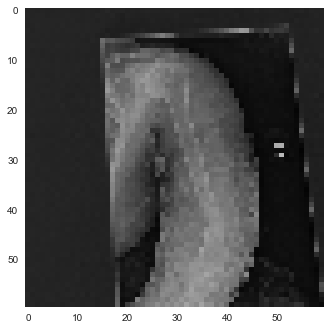

Predicted: Abnormal  [0.56910294]


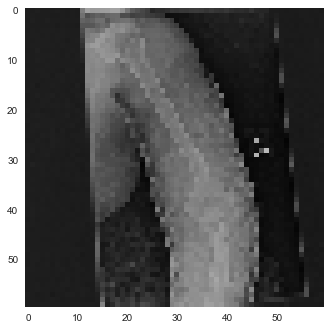

Predicted: Abnormal  [0.40723032]


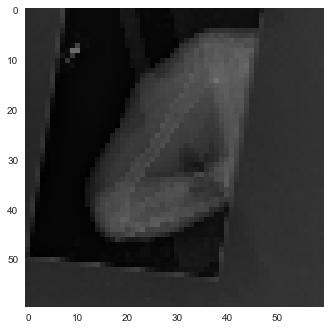

Predicted: Abnormal  [0.67733556]


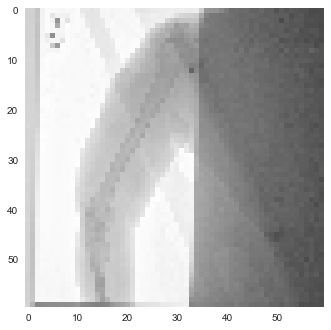

Predicted: Abnormal  [0.39609528]


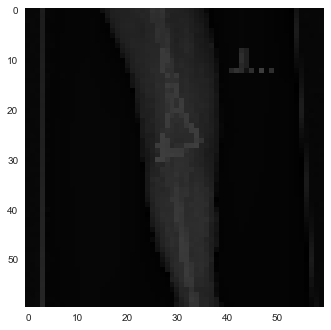

Predicted: Abnormal  [0.42374694]


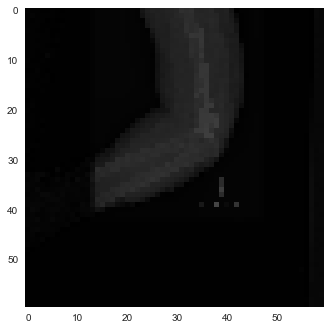

Predicted: Abnormal  [0.4658643]


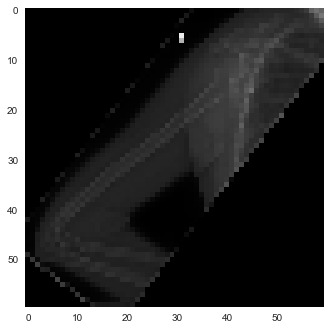

Predicted: Abnormal  [0.6686395]


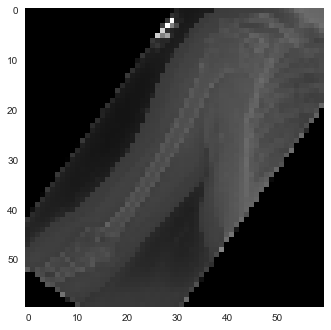

Predicted: Abnormal  [0.36413902]


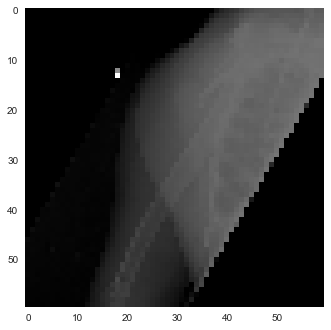

Predicted: Abnormal  [0.5062792]


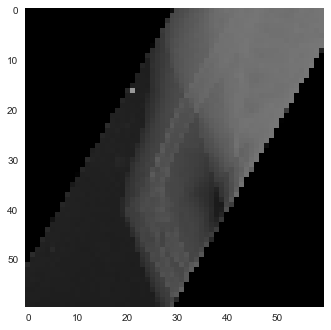

Predicted: Abnormal  [0.60880923]


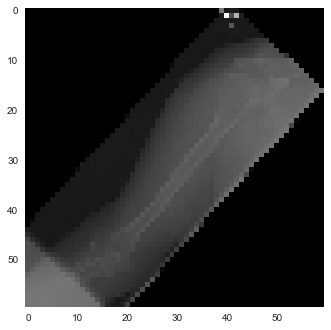

Predicted: Abnormal  [0.6630331]


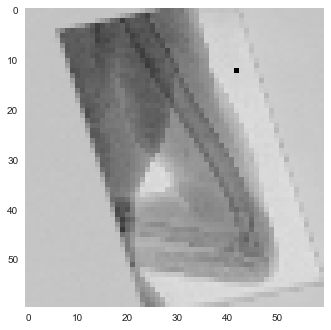

Predicted: Abnormal  [0.5787435]


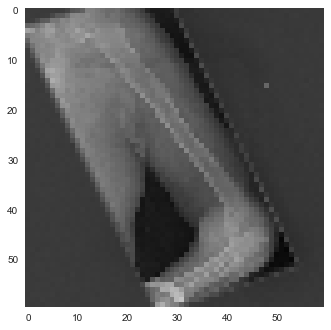

Predicted: Abnormal  [0.5582958]


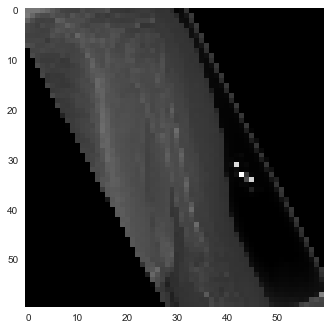

Predicted: Abnormal  [0.5962025]


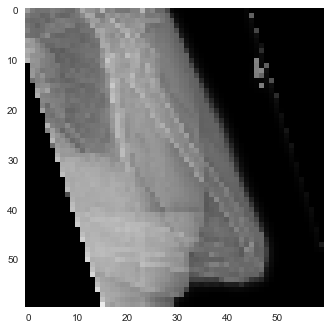

predicted: Normal [0.76828164]


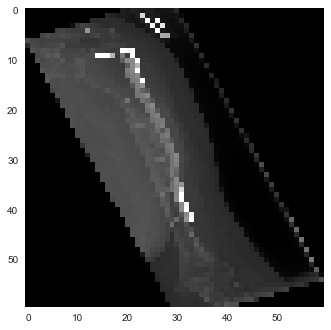

predicted: Normal [0.95770377]


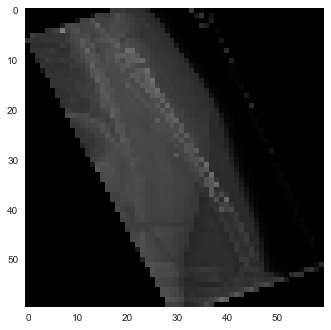

Predicted: Abnormal  [0.6883804]


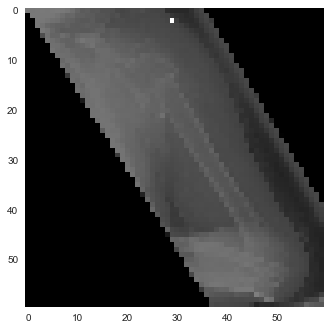

Predicted: Abnormal  [0.05997889]


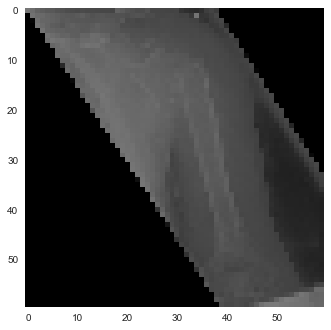

Predicted: Abnormal  [0.3194501]


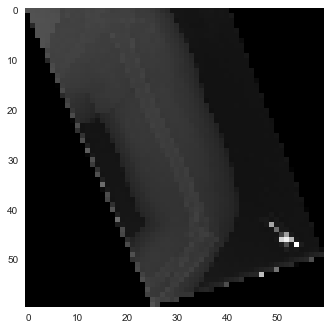

In [74]:
test_accHmerus,kappa_vgg19_hemrus=plotResults(dataHumerus__Test,labelsHumerus_Test,modelHumerus)

Train on 5106 samples, validate on 461 samples
Epoch 1/20
5106/5106 [==============================] - 254s 50ms/step - loss: 5.4478 - accuracy: 0.5850 - val_loss: 3.7321 - val_accuracy: 0.6681
Epoch 2/20
5106/5106 [==============================] - 265s 52ms/step - loss: 3.4821 - accuracy: 0.6298 - val_loss: 3.0424 - val_accuracy: 0.6139
Epoch 3/20
5106/5106 [==============================] - 248s 49ms/step - loss: 2.7844 - accuracy: 0.6453 - val_loss: 2.5347 - val_accuracy: 0.6247
Epoch 4/20
5106/5106 [==============================] - 204s 40ms/step - loss: 2.3073 - accuracy: 0.6539 - val_loss: 2.1339 - val_accuracy: 0.6573
Epoch 5/20
5106/5106 [==============================] - 209s 41ms/step - loss: 1.9414 - accuracy: 0.6671 - val_loss: 1.8437 - val_accuracy: 0.6030
Epoch 6/20
5106/5106 [==============================] - 199s 39ms/step - loss: 1.6628 - accuracy: 0.6727 - val_loss: 1.6103 - val_accuracy: 0.6464
Epoch 7/20
5106/5106 [==============================] - 222s 44ms/step 

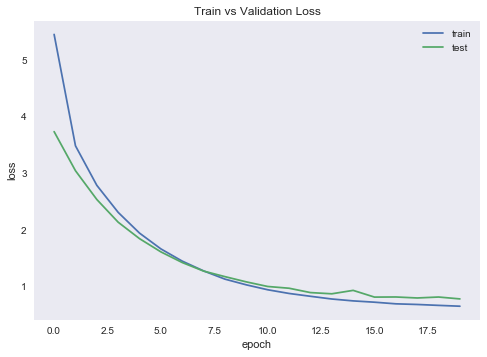

In [75]:
fingerClass='FINGER'
dataFinger__Train_,labelsFinger_Train,dataFinger__Test,labelsFinger_Test=prepareDataVGG(fingerClass)
historyFinger,modelFinger=vgg19Model(dataFinger__Train_,labelsFinger_Train,dataFinger__Test,labelsFinger_Test)
plotingModel(historyFinger)


461/461 [==============================] - 12s 26ms/step
Loss on test set:  0.7806977646469812
Accuracy on test set:  0.6442516446113586


<Figure size 576x396 with 0 Axes>

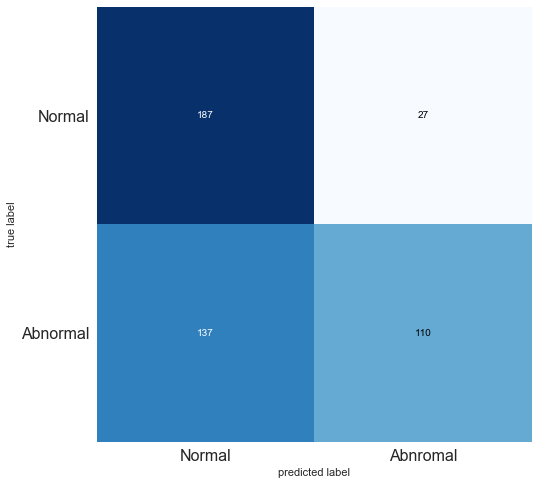

Precison of MURA for Abnormal:0.80
Recall of MURA for Abnormal:0.45
Fmeasure of MURA for Abnormal:0.57
Kappa of MURA for Abnormal:0.64
Predicted: Abnormal  [0.502532]


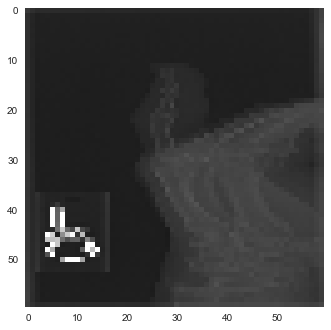

Predicted: Abnormal  [0.48569614]


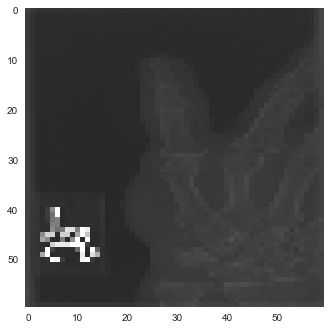

Predicted: Abnormal  [0.5240099]


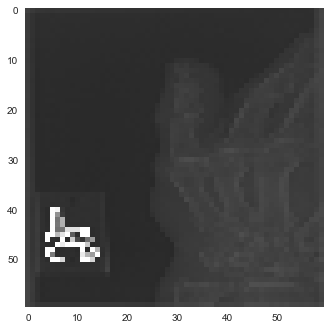

Predicted: Abnormal  [0.32169855]


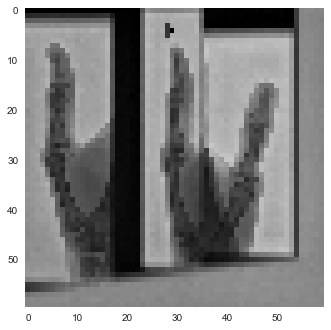

Predicted: Abnormal  [0.13440433]


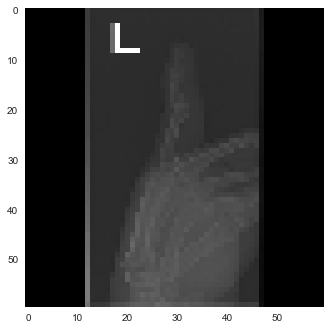

Predicted: Abnormal  [0.2476612]


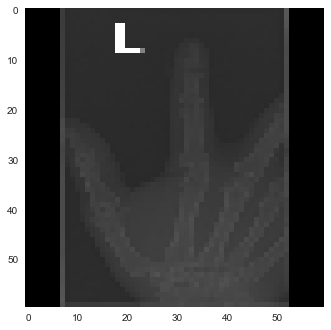

Predicted: Abnormal  [0.20693314]


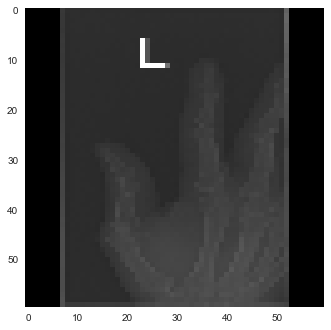

predicted: Normal [0.6841707]


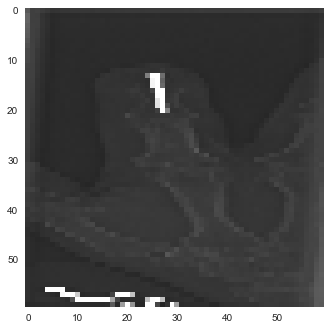

Predicted: Abnormal  [0.38743252]


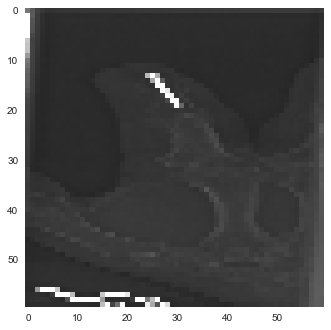

Predicted: Abnormal  [0.5211603]


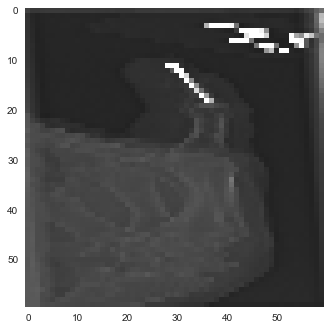

Predicted: Abnormal  [0.52843297]


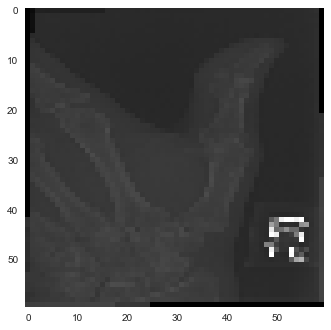

Predicted: Abnormal  [0.62809813]


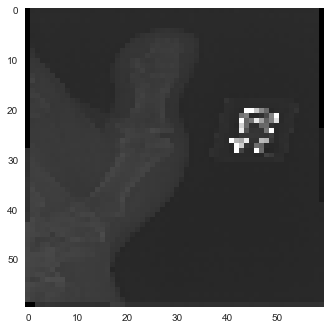

Predicted: Abnormal  [0.53611887]


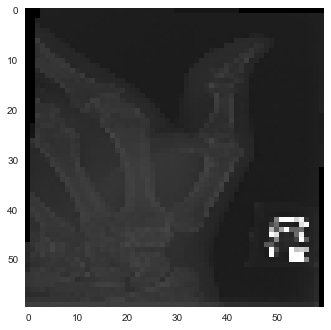

Predicted: Abnormal  [0.38392502]


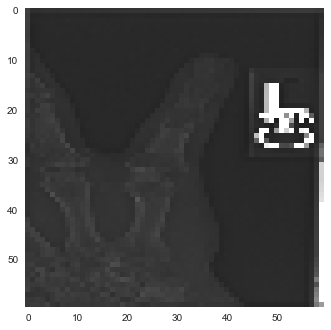

Predicted: Abnormal  [0.48294377]


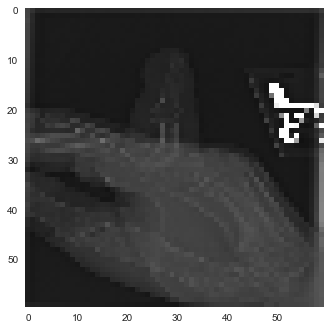

Predicted: Abnormal  [0.53874236]


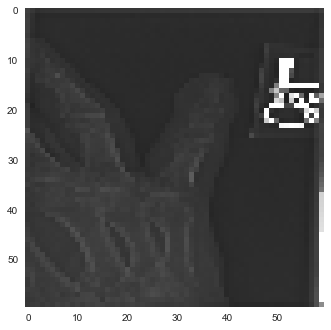

Predicted: Abnormal  [0.07166606]


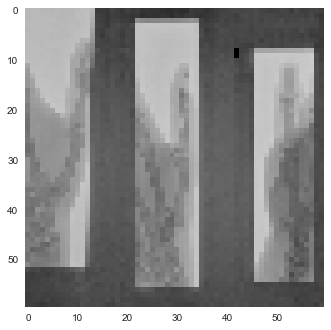

predicted: Normal [0.64958274]


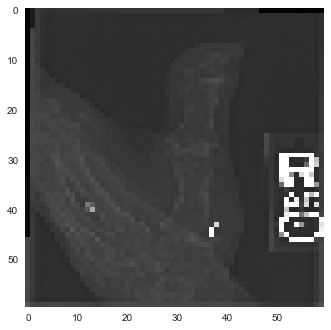

predicted: Normal [0.935611]


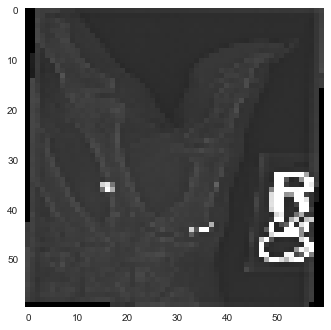

predicted: Normal [0.79468834]


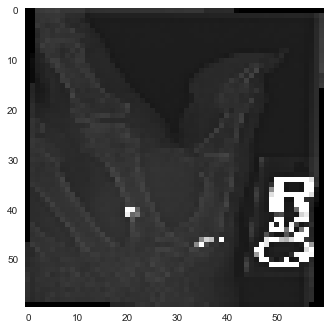

In [76]:
test_accFinger,kappa_vgg19_finger=plotResults(dataFinger__Test,labelsFinger_Test,modelFinger)

Train on 1825 samples, validate on 301 samples
Epoch 1/20
1825/1825 [==============================] - 57s 31ms/step - loss: 7.1939 - accuracy: 0.5649 - val_loss: 5.8470 - val_accuracy: 0.5050
Epoch 2/20
1825/1825 [==============================] - 56s 31ms/step - loss: 5.1813 - accuracy: 0.5940 - val_loss: 4.5448 - val_accuracy: 0.5349
Epoch 3/20
1825/1825 [==============================] - 56s 31ms/step - loss: 4.3922 - accuracy: 0.6137 - val_loss: 4.0512 - val_accuracy: 0.5316
Epoch 4/20
1825/1825 [==============================] - 56s 31ms/step - loss: 3.9583 - accuracy: 0.6225 - val_loss: 3.6994 - val_accuracy: 0.5449
Epoch 5/20
1825/1825 [==============================] - 57s 31ms/step - loss: 3.6056 - accuracy: 0.6466 - val_loss: 3.4749 - val_accuracy: 0.5249
Epoch 6/20
1825/1825 [==============================] - 57s 31ms/step - loss: 3.3509 - accuracy: 0.6455 - val_loss: 3.2359 - val_accuracy: 0.5282
Epoch 7/20
1825/1825 [==============================] - 56s 31ms/step - loss:

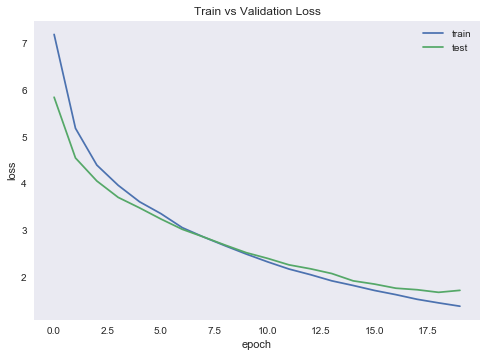

In [77]:
armClass='FOREARM'
dataArm__Train_,labelsArm_Train,dataArm__Test,labelsArm_Test=prepareDataVGG(armClass)
historyArm,modelArm=vgg19Model(dataArm__Train_,labelsArm_Train,dataArm__Test,labelsArm_Test)
plotingModel(historyArm)


301/301 [==============================] - 8s 27ms/step
Loss on test set:  1.7062986903016353
Accuracy on test set:  0.5847176313400269


<Figure size 576x396 with 0 Axes>

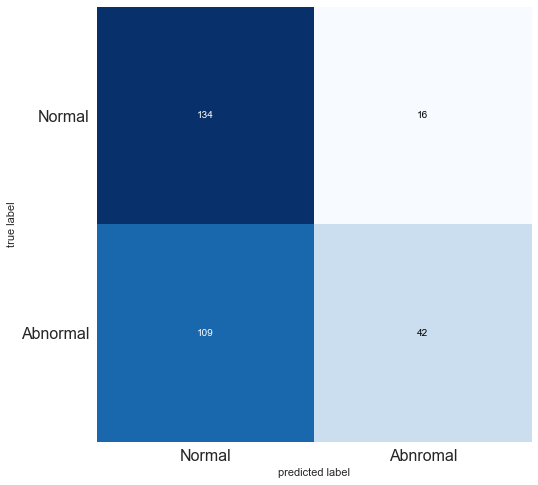

Precison of MURA for Abnormal:0.72
Recall of MURA for Abnormal:0.28
Fmeasure of MURA for Abnormal:0.40
Kappa of MURA for Abnormal:0.62
Predicted: Abnormal  [0.09090966]


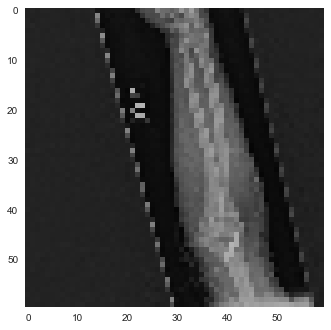

Predicted: Abnormal  [0.33702514]


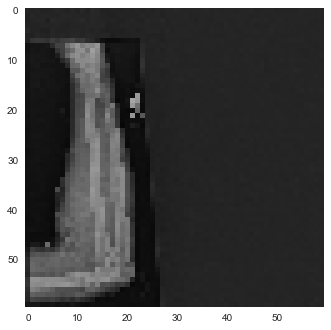

Predicted: Abnormal  [0.12048885]


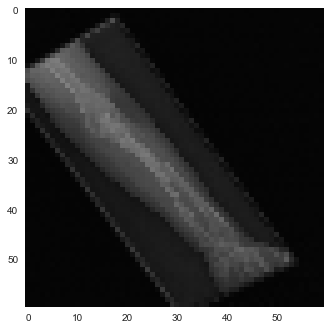

Predicted: Abnormal  [0.1809648]


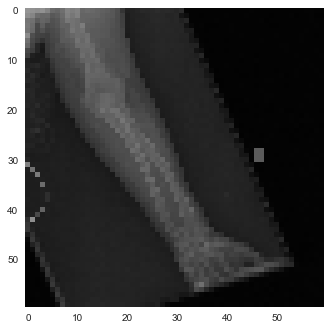

Predicted: Abnormal  [0.11312544]


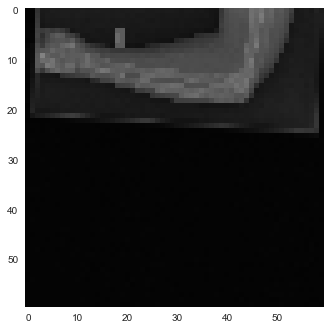

Predicted: Abnormal  [0.01450941]


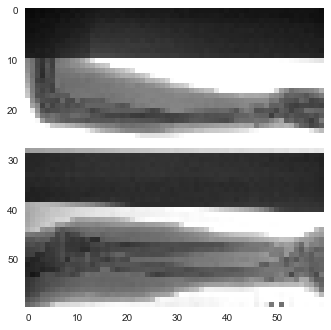

Predicted: Abnormal  [0.18050885]


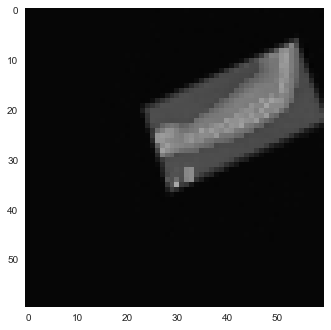

Predicted: Abnormal  [0.34114903]


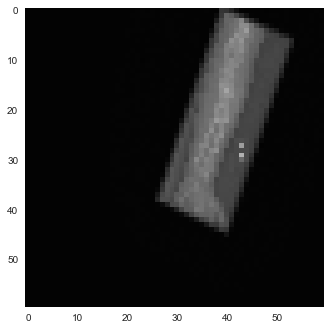

Predicted: Abnormal  [0.10601526]


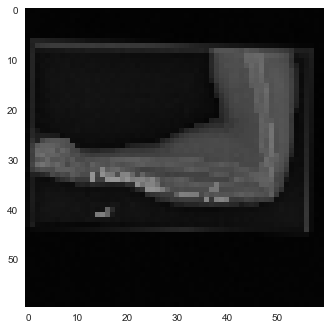

Predicted: Abnormal  [0.54457676]


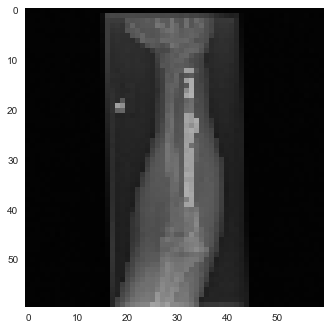

Predicted: Abnormal  [0.45991406]


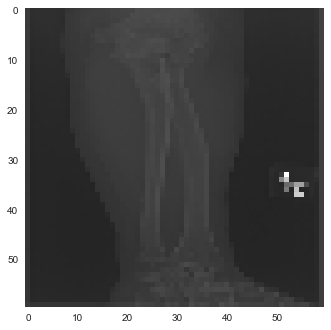

Predicted: Abnormal  [0.16854882]


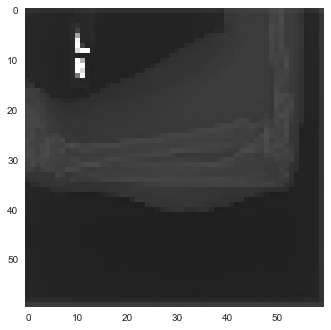

Predicted: Abnormal  [0.16222185]


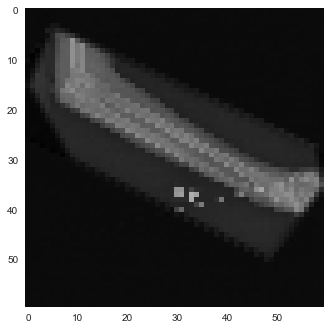

Predicted: Abnormal  [0.26670823]


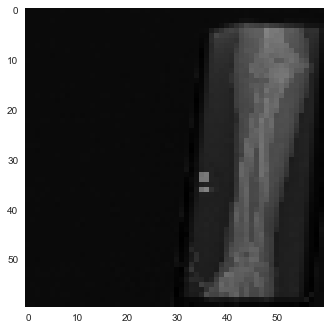

predicted: Normal [0.7854844]


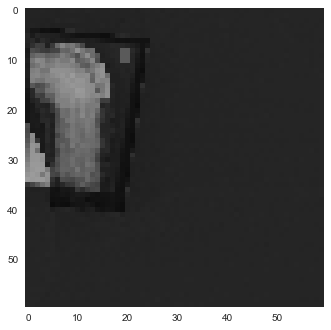

Predicted: Abnormal  [0.08425948]


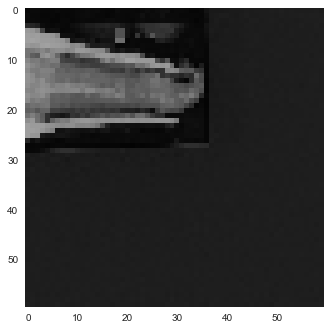

Predicted: Abnormal  [0.2377489]


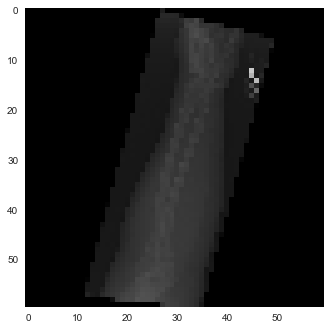

Predicted: Abnormal  [0.37771595]


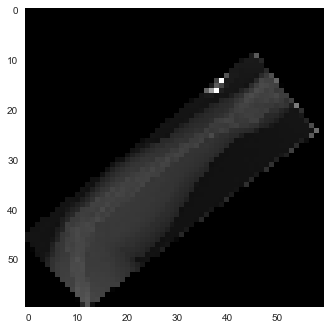

Predicted: Abnormal  [0.20495151]


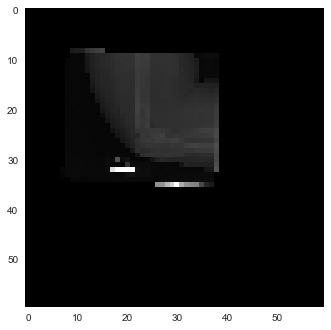

Predicted: Abnormal  [0.25310677]


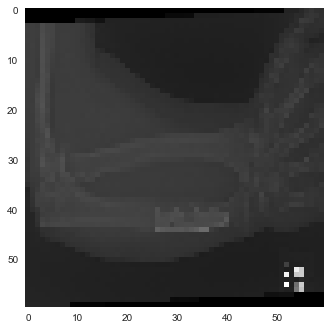

In [78]:
test_accArm,kappa_vgg19_arm=plotResults(dataArm__Test,labelsArm_Test,modelArm)

Train on 5543 samples, validate on 460 samples
Epoch 1/20
5543/5543 [==============================] - 160s 29ms/step - loss: 4.5566 - accuracy: 0.6432 - val_loss: 3.1702 - val_accuracy: 0.6109
Epoch 2/20
5543/5543 [==============================] - 169s 30ms/step - loss: 2.7256 - accuracy: 0.6989 - val_loss: 2.3992 - val_accuracy: 0.5913
Epoch 3/20
5543/5543 [==============================] - 161s 29ms/step - loss: 2.1010 - accuracy: 0.7124 - val_loss: 1.9287 - val_accuracy: 0.5913
Epoch 4/20
5543/5543 [==============================] - 203s 37ms/step - loss: 1.6756 - accuracy: 0.7299 - val_loss: 1.6019 - val_accuracy: 0.5891
Epoch 5/20
5543/5543 [==============================] - 227s 41ms/step - loss: 1.3870 - accuracy: 0.7305 - val_loss: 1.3689 - val_accuracy: 0.5891
Epoch 6/20
5543/5543 [==============================] - 188s 34ms/step - loss: 1.1836 - accuracy: 0.7359 - val_loss: 1.2011 - val_accuracy: 0.5891
Epoch 7/20
5543/5543 [==============================] - 159s 29ms/step 

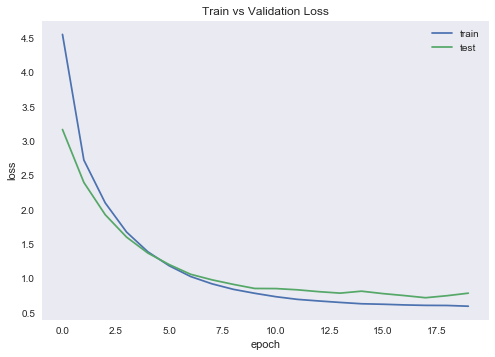

In [79]:
handClass='HAND'
dataHand__Train_,labelsHand_Train,dataHand__Test,labelsHand_Test=prepareDataVGG(handClass)
historyHand,modelHand=vgg19Model(dataHand__Train_,labelsHand_Train,dataHand__Test,labelsHand_Test)
plotingModel(historyHand)


460/460 [==============================] - 21s 47ms/step
Loss on test set:  0.7847479840983516
Accuracy on test set:  0.606521725654602


<Figure size 576x396 with 0 Axes>

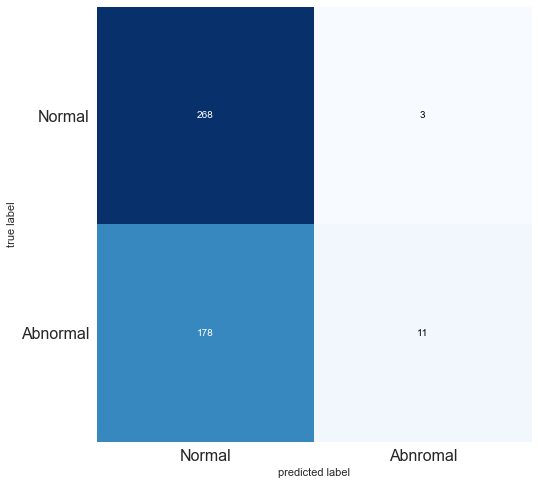

Precison of MURA for Abnormal:0.79
Recall of MURA for Abnormal:0.06
Fmeasure of MURA for Abnormal:0.11
Kappa of MURA for Abnormal:0.77
Predicted: Abnormal  [0.2694009]


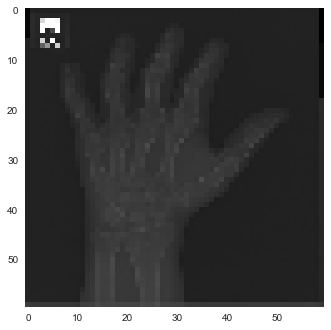

Predicted: Abnormal  [0.16187736]


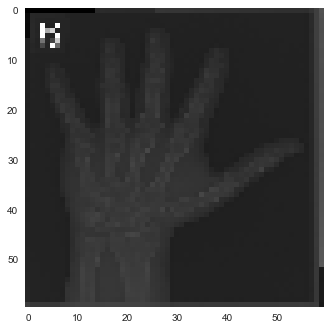

Predicted: Abnormal  [0.27950057]


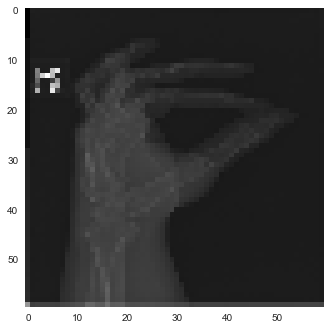

Predicted: Abnormal  [0.28329378]


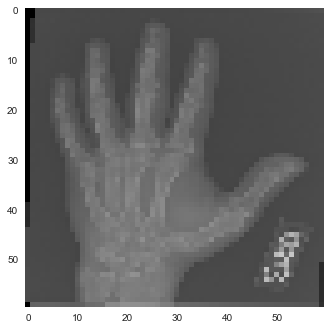

Predicted: Abnormal  [0.28788906]


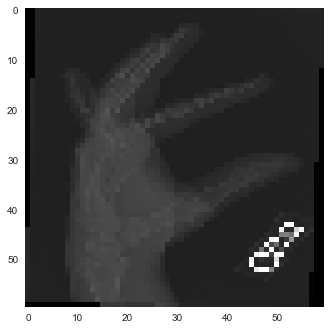

Predicted: Abnormal  [0.27812016]


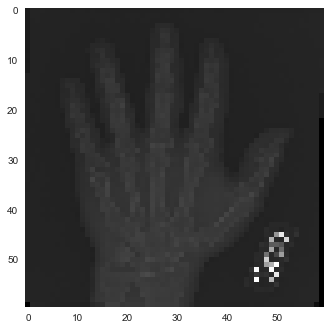

Predicted: Abnormal  [0.12673739]


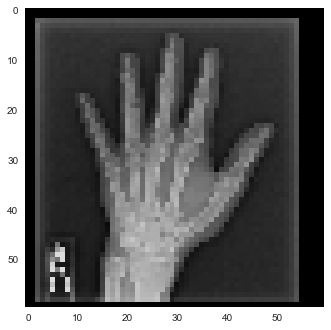

Predicted: Abnormal  [0.05247456]


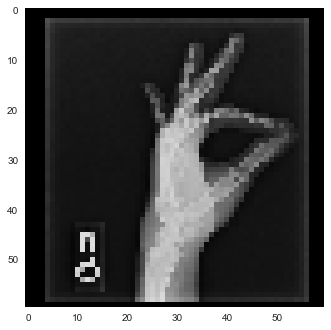

Predicted: Abnormal  [0.11174306]


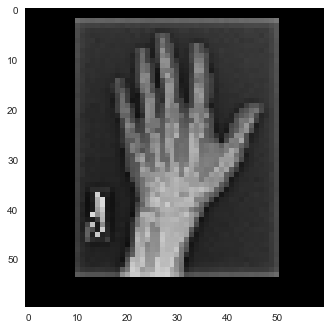

Predicted: Abnormal  [0.18626714]


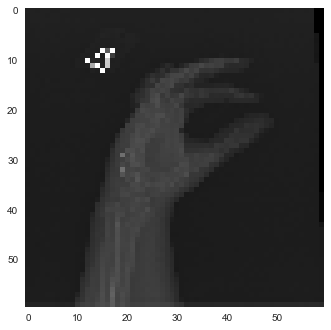

Predicted: Abnormal  [0.3025651]


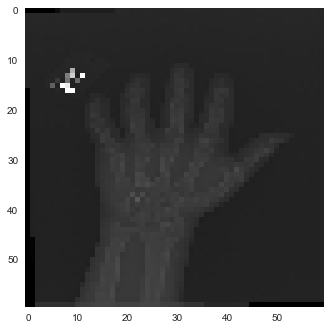

Predicted: Abnormal  [0.29081792]


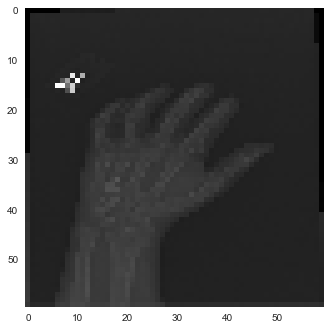

Predicted: Abnormal  [0.20338538]


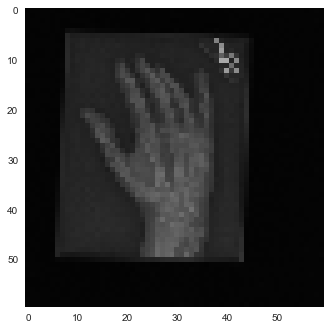

Predicted: Abnormal  [0.18636015]


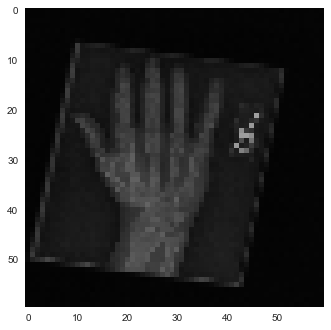

Predicted: Abnormal  [0.43210804]


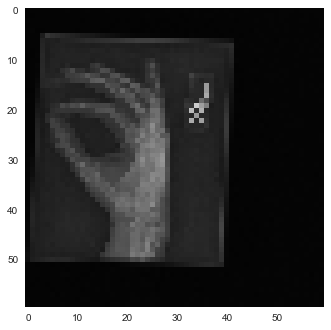

Predicted: Abnormal  [0.25042343]


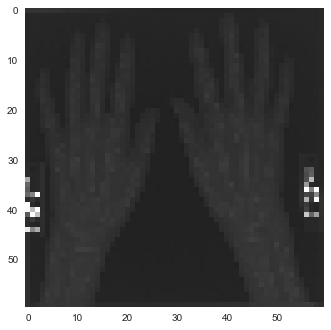

Predicted: Abnormal  [0.37763646]


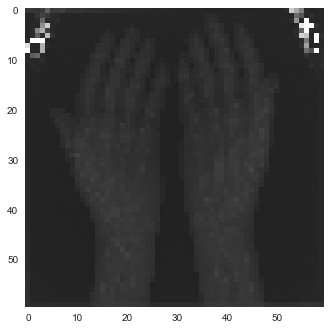

Predicted: Abnormal  [0.08845645]


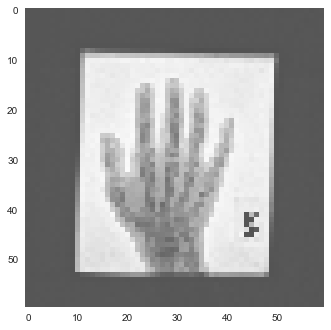

Predicted: Abnormal  [0.17823903]


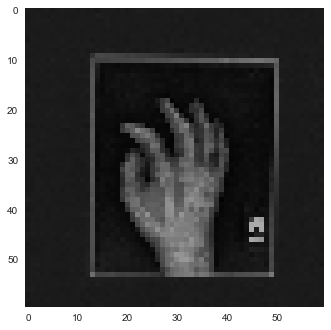

Predicted: Abnormal  [0.14965346]


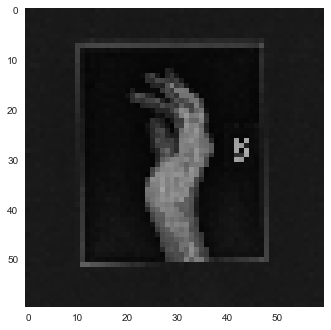

In [80]:
test_accHand,kappa_vgg19_hand=plotResults(dataHand__Test,labelsHand_Test,modelHand)

Train on 8379 samples, validate on 563 samples
Epoch 1/20
8379/8379 [==============================] - 500s 60ms/step - loss: 5.1777 - accuracy: 0.5119 - val_loss: 3.6163 - val_accuracy: 0.5577
Epoch 2/20
8379/8379 [==============================] - 351s 42ms/step - loss: 3.1695 - accuracy: 0.5303 - val_loss: 2.6639 - val_accuracy: 0.5790
Epoch 3/20
8379/8379 [==============================] - 262s 31ms/step - loss: 2.3434 - accuracy: 0.5427 - val_loss: 2.0371 - val_accuracy: 0.5968
Epoch 4/20
8379/8379 [==============================] - 259s 31ms/step - loss: 1.8207 - accuracy: 0.5690 - val_loss: 1.6222 - val_accuracy: 0.5933
Epoch 5/20
8379/8379 [==============================] - 259s 31ms/step - loss: 1.4768 - accuracy: 0.5831 - val_loss: 1.3438 - val_accuracy: 0.5915
Epoch 6/20
8379/8379 [==============================] - 240s 29ms/step - loss: 1.2406 - accuracy: 0.5941 - val_loss: 1.1471 - val_accuracy: 0.5861
Epoch 7/20
8379/8379 [==============================] - 266s 32ms/step 

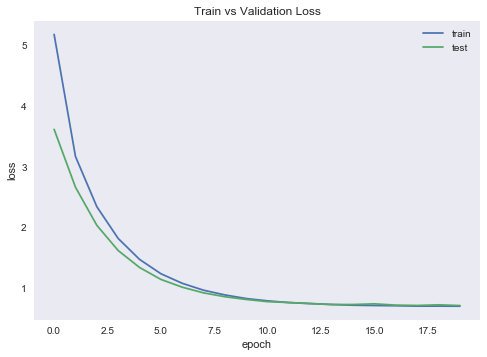

In [81]:
shoulderClass='SHOULDER'
dataShoulder__Train_,labelsShoulder_Train,dataShoulder__Test,labelsShoulder_Test=prepareDataVGG(shoulderClass)
historyShoulder,modelShoulder=vgg19Model(dataShoulder__Train_,labelsShoulder_Train,dataShoulder__Test,labelsShoulder_Test)
plotingModel(historyShoulder)


563/563 [==============================] - 21s 38ms/step
Loss on test set:  0.7172095645384509
Accuracy on test set:  0.6039076447486877


<Figure size 576x396 with 0 Axes>

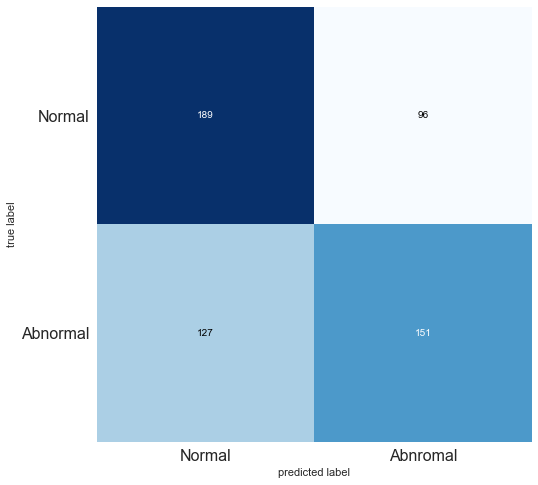

Precison of MURA for Abnormal:0.61
Recall of MURA for Abnormal:0.54
Fmeasure of MURA for Abnormal:0.58
Kappa of MURA for Abnormal:0.15
Predicted: Abnormal  [0.4291711]


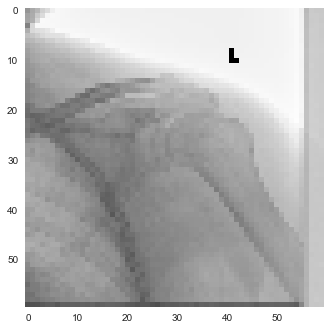

Predicted: Abnormal  [0.37529388]


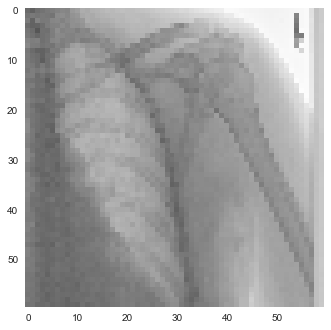

predicted: Normal [0.7037655]


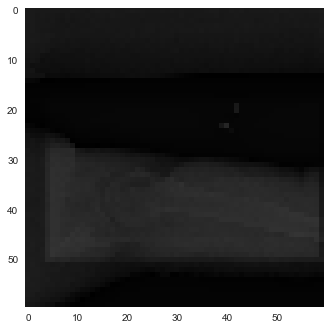

Predicted: Abnormal  [0.4348261]


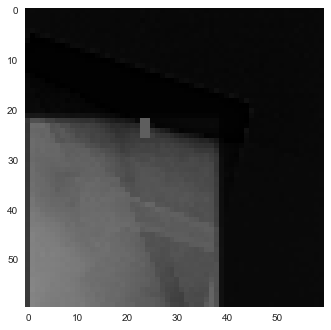

Predicted: Abnormal  [0.55127096]


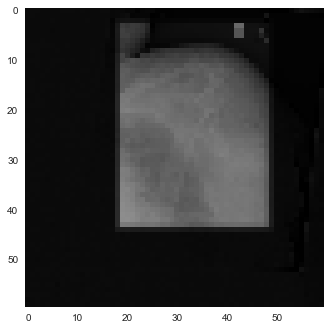

Predicted: Abnormal  [0.58046573]


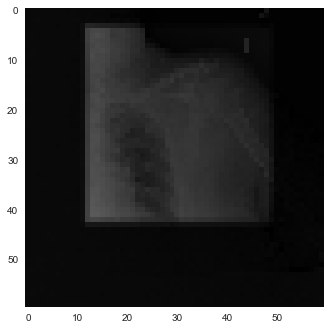

Predicted: Abnormal  [0.44928795]


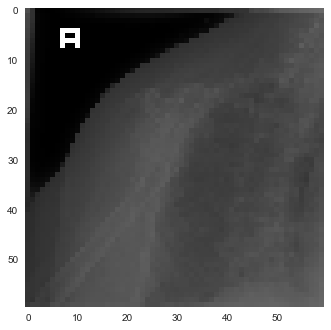

Predicted: Abnormal  [0.48626253]


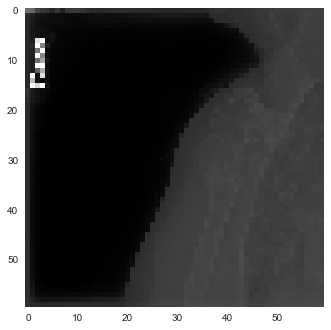

Predicted: Abnormal  [0.477529]


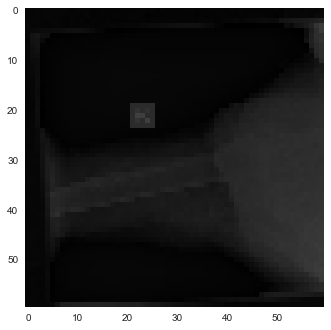

Predicted: Abnormal  [0.37845442]


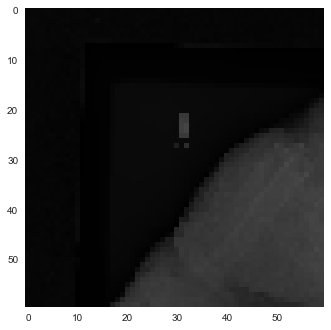

Predicted: Abnormal  [0.44418144]


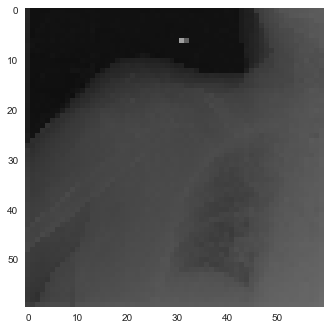

Predicted: Abnormal  [0.37369543]


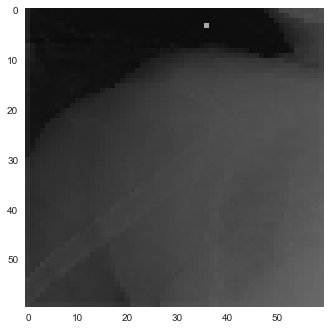

Predicted: Abnormal  [0.36833036]


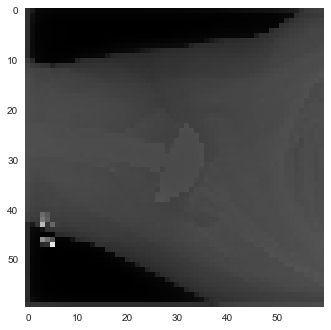

Predicted: Abnormal  [0.5106841]


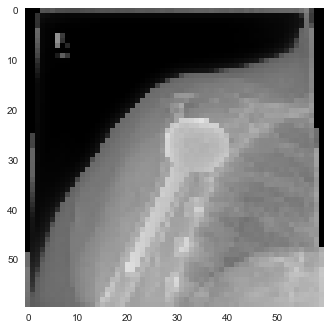

Predicted: Abnormal  [0.4601062]


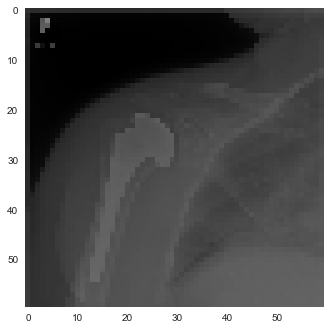

Predicted: Abnormal  [0.4306631]


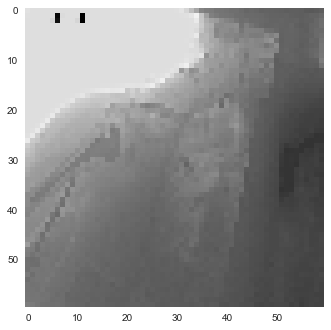

Predicted: Abnormal  [0.40853643]


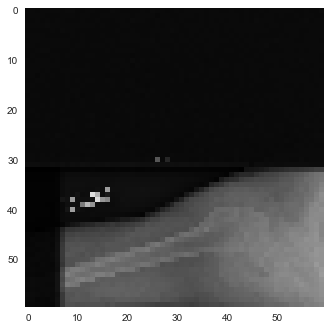

Predicted: Abnormal  [0.4066021]


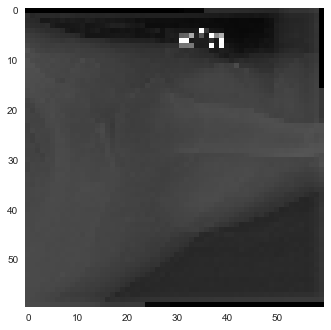

Predicted: Abnormal  [0.4750316]


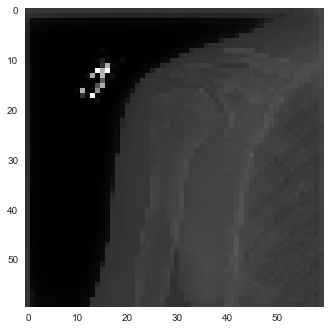

Predicted: Abnormal  [0.34959403]


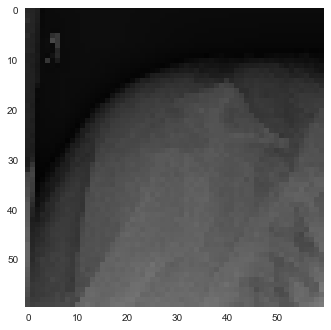

In [82]:
test_accShoulder,kappa_vgg19_shoulder=plotResults(dataShoulder__Test,labelsShoulder_Test,modelShoulder)

In [ ]:
wristClass='WRIST'
dataWrist__Train_,labelsWrist_Train,dataWrist__Test,labelsWrist_Test=prepareDataVGG(wristClass)
historyWrist,modelWrist=vgg19Model(dataWrist__Train_,labelsWrist_Train,dataWrist__Test,labelsWrist_Test)
plotingModel(historyWrist)


Train on 9752 samples, validate on 659 samples
Epoch 1/20
9752/9752 [==============================] - 317s 33ms/step - loss: 4.4183 - accuracy: 0.5899 - val_loss: 3.0114 - val_accuracy: 0.6176
Epoch 2/20
9752/9752 [==============================] - 305s 31ms/step - loss: 2.5334 - accuracy: 0.6282 - val_loss: 2.0724 - val_accuracy: 0.6586
Epoch 3/20
9752/9752 [==============================] - 297s 30ms/step - loss: 1.7808 - accuracy: 0.6539 - val_loss: 1.5176 - val_accuracy: 0.6601
Epoch 4/20
9752/9752 [==============================] - 318s 33ms/step - loss: 1.3418 - accuracy: 0.6763 - val_loss: 1.1990 - val_accuracy: 0.6237
Epoch 5/20
5696/9752 [================>.............] - ETA: 2:00 - loss: 1.1189 - accuracy: 0.6801

In [ ]:
test_accWrist,kappa_vgg19_wrist=plotResults(dataWrist__Test,labelsWrist_Test,modelWrist)

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
bodyPart = ['ELBOW', 'FINGER','FOREARM','HAND', 'HUMERUS', 'SHOULDER', 'WRIST']
test_acc = [test_accElbow,test_accFinger,test_accArm,test_accHand,test_accHmerus,test_accShoulder,test_accWrist]
ax.bar(bodyPart,test_acc)
plt.title("VGG19 Body Parts Accuracies")
plt.ylabel('Body Part')
plt.xlabel('Accuracy')

plt.show()

$Molbile Net$

In [ ]:
armClass='FOREARM'
dataArm__Train_mobile,labelsArm_Train_mobile,dataArm__Test_mobile,labelsArm_Test_mobile=prepareDataMobile(armClass)
historyMobile_arm, modelMobile_arm=mobileNet_Model(dataArm__Train_mobile,labelsArm_Train_mobile,dataArm__Test_mobile,labelsArm_Test_mobile)
plotingModel(historyMobile_arm)


In [ ]:
test_accArm_mob=plotResults(dataArm__Test_mobile,labelsArm_Test_mobile,modelMobile_arm)

In [ ]:
elbowClass='ELBOW'
dataElbow__Train_mobile,labelsElbow_Train_mobile,dataElbow__Test_mobile,labelsWlbow_Test_mobile=prepareDataMobile(elbowClass)
historyMobile_elbow, modelMobile_elbow=mobileNet_Model(dataElbow__Train_mobile,labelsElbow_Train_mobile,dataElbow__Test_mobile,labelsWlbow_Test_mobile)
plotingModel(historyMobile_elbow)


In [ ]:
test_accElbow_mob,kappa_elbowMobile=plotResults(dataElbow__Test_mobile,labelsWlbow_Test_mobile,modelMobile_elbow)

In [ ]:
fingerClass='FINGER'
dataFinger__Train_mobile,labelsFinger_Train_mobile,dataFinger__Test_mobile,labelsFinger_Test_mobile=prepareDataMobile(fingerClass)
historyMobile_finger, modelMobile_finger=mobileNet_Model(dataFinger__Train_mobile,labelsFinger_Train_mobile,dataFinger__Test_mobile,labelsFinger_Test_mobile)
plotingModel(historyMobile_finger)


In [ ]:
test_accFinger_mob,kappa_FingerMobile=plotResults(dataFinger__Test_mobile,labelsFinger_Test_mobile,modelMobile_finger)


In [ ]:
humerusClass='HUMERUS'
dataHumerus__Train_mobile,labelsHumrus_Train_mobile,dataHumerus__Test_mobile,labelsHumerus_Test_mobile=prepareDataMobile(humerusClass)
historyHumerus_mobile,modelHumerus_mobile=mobileNet_Model(dataHumerus__Train_mobile,labelsHumrus_Train_mobile,dataHumerus__Test_mobile,labelsHumerus_Test_mobile)
plotingModel(historyHumerus_mobile)


In [ ]:
test_accHmerus_mob,kappa_hermusMobile=plotResults(dataHumerus__Test_mobile,labelsHumerus_Test_mobile,modelHumerus_mobile)

In [ ]:
shoulderClass='SHOULDER'
dataShoulder__Train_mobile,labelsShoulder_Train_mobile,dataShoulder__Test_mobile,labelsShoulder_Test_mobile=prepareDataMobile(shoulderClass)
historyShoulder_mobile,modelShoulder_mobile=mobileNet_Model(dataShoulder__Train_mobile,labelsShoulder_Train_mobile,dataShoulder__Test_mobile,labelsShoulder_Test_mobile)
plotingModel(historyShoulder)


In [ ]:
test_accShoulder_mob,kappa_shoulderMobile=plotResults(dataShoulder__Test,labelsShoulder_Test,modelShoulder)

In [ ]:
handClass='HAND'
dataHAND__Train_mobile,labelsHAND_Train_mobile,dataHAND__Test_mobile,labelsHAND_Test_mobile=prepareDataMobile(handClass)
historyHand_mobile,modelHand_mobile=mobileNet_Model(dataHAND__Train_mobile,labelsHAND_Train_mobile,dataHAND__Test_mobile,labelsHAND_Test_mobile)
plotingModel(historyHand_mobile)


In [ ]:
test_accHand_mob,kappa_handMobile=plotResults(dataHAND__Test_mobile,labelsHAND_Test_mobile,modelHand_mobile)

In [ ]:
wristClass='WRIST'
dataWRIST__Train_mobile,labelsWRIST_Train_mobile,dataWRIST__Test_mobile,labelsWRIST_Test_mobile=prepareDataMobile(wristClass)
historyWrist_mobile,modelWrist_mobile=mobileNet_Model(dataWRIST__Train_mobile,labelsWRIST_Train_mobile,dataWRIST__Test_mobile,labelsWRIST_Test_mobile)
plotingModel(historyWrist_mobile)


In [ ]:
test_accWrist_mob,kappa_wristMobile=plotResults(dataWRIST__Test_mobile,labelsWRIST_Test_mobile,modelWrist_mobile)

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import feature_column
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import os
import glob
import cv2
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow_hub as hub
from keras.preprocessing import image

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
bodyPart = ['ELBOW', 'FINGER','FOREARM','HAND', 'HUMERUS', 'SHOULDER', 'WRIST']
test_acc = [test_accElbow_mob,test_accFinger_mob,test_accArm_mob,test_accHand_mob,test_accHmerus_mob,test_accShoulder_mob,test_accWrist_mob]
ax.bar(bodyPart,test_acc)
plt.title("MobileNet Body Parts Accuracies")
plt.ylabel('Body Part')
plt.xlabel('Accuracy')

plt.show()

$Inception Model$

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import feature_column
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from sklearn.model_selection import train_test_split
import os
import glob
import cv2
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow_hub as hub
from keras.preprocessing import image

In [ ]:
def load_data(className):
    reszizing_Dim=(224,224)
    train_= train_labels[train_labels['Body Part'] ==className]
    test_ = test_labels[test_labels['Body Part'] ==className]
    data__Test=stretching_Data(test_,reszizing_Dim)
    labels_Test=stretching_Labels(test_)
    data__Train=stretching_Data(train_,reszizing_Dim)
    labels_Train=stretching_Labels(train_)
    data__Test=np.asarray(data__Test)
    labels_Test=np.asarray(labels_Test)
    data__Train=np.asarray(data__Train)
    labels_Train=np.asarray(labels_Train)

    return data__Train,labels_Train,data__Test,labels_Test

In [ ]:
inception_base_layer = hub.KerasLayer("https://tfhub.dev/google/imagenet/inception_v1/feature_vector/4")
inception_model = tf.keras.Sequential()
inception_model.add(inception_base_layer)
inception_model.add(tf.keras.layers.Flatten())
inception_model.add(tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
inception_model.add(tf.keras.layers.Dropout(0.5))
inception_model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
inception_model.build([None, 224, 224, 3])
inception_model.compile(optimizer = 'adam', loss="binary_crossentropy", metrics = ['accuracy'])


In [ ]:
train_X_ELBOW, train_y_ELBOW,validation_X_ELBOW, validation_y_ELBOW = load_data("ELBOW")
train_X_ELBOW = train_X_ELBOW.reshape(-1, 224, 224, 3) / 255.0
validation_X_ELBOW = validation_X_ELBOW.reshape(-1, 224, 224, 3) / 255.0
history_inception_ELBOW = inception_model.fit(train_X_ELBOW, train_y_ELBOW, epochs=20, batch_size=64, validation_data=(validation_X_ELBOW, validation_y_ELBOW))


In [ ]:
test_Elbow_inception=plotResults(validation_X_ELBOW,validation_y_ELBOW,inception_model)
plotingModel(history_inception_ELBOW)


In [ ]:
train_X_FOREARM, train_y_FOREARM,validation_X_FOREARM, validation_y_FOREARM = load_data("FOREARM")
train_X_FOREARM = train_X_FOREARM.reshape(-1, 224, 224, 3) / 255.0
validation_X_FOREARM = validation_X_FOREARM.reshape(-1, 224, 224, 3) / 255.0
history_inception_FORARM = inception_model.fit(train_X_FOREARM, train_y_FOREARM, epochs=20, batch_size=64, validation_data=(validation_X_FOREARM, validation_y_FOREARM))



In [ ]:
test_Arm_inception=plotResults(validation_X_FOREARM, validation_y_FOREARM,inception_model)
plotingModel(history_inception_FORARM)

In [ ]:
train_X_HAND, train_y_HAND,validation_X_HAND, validation_y_HAND = load_data("HAND")
train_X_HAND = train_X_HAND.reshape(-1, 224, 224, 3) / 255.0
validation_X_HAND = validation_X_HAND.reshape(-1, 224, 224, 3) / 255.0
history_inception_HAND = inception_model.fit(train_X_HAND, train_y_HAND, epochs=10, batch_size=64, validation_data=(validation_X_HAND, validation_y_HAND))



In [ ]:
test_HAND_inception=plotResults(validation_X_HAND, validation_y_HAND,inception_model)
plotingModel(history_inception_HAND)

In [ ]:
train_X_HUMERUS, train_y_HUMERUS,validation_X_HUMERUS, validation_y_HUMERUS = load_data("HUMERUS")
train_X_HUMERUS = train_X_HUMERUS.reshape(-1, 224, 224, 3) / 255.0
validation_X_HUMERUS = validation_X_HUMERUS.reshape(-1, 224, 224, 3) / 255.0
history_inception_HUMERUS =  inception_model.fit(train_X_HUMERUS, train_y_HUMERUS, epochs=10, batch_size=64, validation_data=(validation_X_HUMERUS, validation_y_HUMERUS))



In [ ]:
test_HUMERUS_inception=plotResults(validation_X_HUMERUS, validation_y_HUMERUS,inception_model)
plotingModel(history_inception_HUMERUS)

In [ ]:
train_X_WRIST, train_y_WRIST,validation_X_WRIST, validation_y_WRIST = load_data("WRIST")
train_X_WRIST = train_X_WRIST.reshape(-1, 224, 224, 3) / 255.0
validation_X_WRIST = validation_X_WRIST.reshape(-1, 224, 224, 3) / 255.0
history_inception_WRIST = inception_model.fit(train_X_WRIST, train_y_WRIST, epochs=20, batch_size=64, validation_data=(validation_X_WRIST, validation_y_WRIST))



In [ ]:
test_WRIST_inception=plotResults(validation_X_WRIST, validation_y_WRIST,inception_model)
plotingModel(history_inception_WRIST)

In [ ]:
train_X_SHOULDER, train_y_SHOULDER,validation_X_SHOULDER, validation_y_SHOULDER = load_data("SHOULDER")
train_X_SHOULDER = train_X_SHOULDER.reshape(-1, 224, 224, 3) / 255.0
validation_X_SHOULDER = validation_X_SHOULDER.reshape(-1, 224, 224, 3) / 255.0
history_inception_SHOULDER= inception_model.fit(train_X_SHOULDER, train_y_SHOULDER, epochs=20, batch_size=64, validation_data=(validation_X_SHOULDER, validation_y_SHOULDER))
test_SHOULDER_inception=plotResults(validation_X_SHOULDER, validation_y_SHOULDER,inception_model)
plotingModel(history_inception_SHOULDER)


In [ ]:
train_X_FINGER, train_y_FINGER,validation_X_FINGER, validation_y_FINGER = load_data("FINGER")
train_X_FINGER = train_X_FINGER.reshape(-1, 224, 224, 3) / 255.0
validation_X_FINGER = validation_X_FINGER.reshape(-1, 224, 224, 3) / 255.0
history_inception_FINGER= inception_model.fit(train_X_FINGER, train_y_FINGER, epochs=20, batch_size=64, validation_data=(validation_X_FINGER, validation_y_FINGER))
test_FINGER_inception=plotResults(validation_X_FINGER, validation_y_FINGER,inception_model)
plotingModel(history_inception_FINGER)


In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
bodyPart = ['ELBOW', 'FINGER','FOREARM','HAND', 'HUMERUS', 'SHOULDER', 'WRIST']
test_acc = [test_Elbow_inception,test_FINGER_inception,test_Arm_inception,test_HAND_inception,test_HUMERUS_inception,test_SHOULDER_inception,history_inception_WRIST]
ax.bar(bodyPart,test_acc)
plt.title("Inception Body Parts Accuracies")
plt.ylabel('Body Part')
plt.xlabel('Accuracy')

plt.show()

In [ ]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

bars1 = [test_Elbow_inception,test_FINGER_inception,test_Arm_inception,test_HAND_inception,test_HUMERUS_inception,test_SHOULDER_inception,history_inception_WRIST]
bars2 = [test_accElbow_mob,test_accFinger_mob,test_accArm_mob,test_accHand_mob,test_accHmerus_mob,test_accShoulder_mob,test_accWrist_mob]
bars3 = [test_accElbow,test_accFinger,test_accArm,test_accHand,test_accHmerus,test_accShoulder,test_accWrist]

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
plt.bar(r1, bars1, color='#ffcc00', width=barWidth, edgecolor='white', label='Inception')
plt.bar(r2, bars2, color='#02a8a8', width=barWidth, edgecolor='white', label='MobileNet')
plt.bar(r3, bars3, color='#0c9463', width=barWidth, edgecolor='white', label='VGG19')
 
plt.xlabel('Body Part', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['ELBOW', 'FINGER','FOREARM','HAND', 'HUMERUS', 'SHOULDER', 'WRIST'])
 
plt.legend()
plt.show()
